In [1]:
!pip install opendatasets
import opendatasets as od

In [2]:
od.download("https://www.kaggle.com/datasets/uciml/forest-cover-type-dataset")

Skipping, found downloaded files in ".\forest-cover-type-dataset" (use force=True to force download)


<center><h1><b>Introduction</b></h1></center>

<i>Can we predict the type of tree cover given cartographic data such as elevation, hydrologic, sunlight and soil data?</i> <b>This project attempts to predict the predominant type of tree in sections of wooded areas.</b>

Understanding forest composition is a valuable aspect of managing the health and vitality of our wilderness areas. Classifying cover type can help further research regarding forest fire susceptibility and de/re-forestation concerns.

The data used in this report was taken from the UCI Machine Learning Repository. The data set consists of 15,120 samples of 30m x 30m patches of forest located in northern Colorado’s Roosevelt National Forest. . These areas represent forests with minimal human-caused disturbances, so forest covers are more a result of ecological processes than forest management practices.

The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. Each observation is a 30m x 30m patch. We will be predicting an integer classification for the forest cover type. The seven types are:

1. Spruce/Fir
2. Lodgepole Pine  
3. Ponderosa Pine  
4. Cottonwood/Willow  
5. Aspen  
6. Douglas-fir  
7. Krummholz  

## <li><u><i>Importing Files</i></u></li>

In [2]:
#importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

<center><b>About the Dataset</b></center>
The Dataset has been taken from UCI dataset on Roosevelt National Park consists of 581012 rows and 55 columns, which represent various Forest Cover Type and the factors upon which they depend such as Elevation, Soil Type etc. Table II contains details about record count. Thus, the dataset has unbalanced class distribution. Unbalanced data classification has its own classification complexity. For example, a classifier having good accuracy may give best prediction for majority classes but worst prediction for minority classes. As data point for minority lasses are low, accuracy will be still high.
Therefore, a good classifier should have a balance between classification accuracy over all classes, i.e., minority as well as majority classes.

In [3]:
df=pd.read_csv(r"C:\Users\vedan\forest-cover-type-dataset\covtype.csv")
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [5]:
df["Cover_Type"].value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

In [6]:
df.shape

(581012, 55)

In [7]:
df.nunique()

Elevation                             1978
Aspect                                 361
Slope                                   67
Horizontal_Distance_To_Hydrology       551
Vertical_Distance_To_Hydrology         700
Horizontal_Distance_To_Roadways       5785
Hillshade_9am                          207
Hillshade_Noon                         185
Hillshade_3pm                          255
Horizontal_Distance_To_Fire_Points    5827
Wilderness_Area1                         2
Wilderness_Area2                         2
Wilderness_Area3                         2
Wilderness_Area4                         2
Soil_Type1                               2
Soil_Type2                               2
Soil_Type3                               2
Soil_Type4                               2
Soil_Type5                               2
Soil_Type6                               2
Soil_Type7                               2
Soil_Type8                               2
Soil_Type9                               2
Soil_Type10

In [8]:
df.astype(bool).sum(axis=0)

Elevation                             581012
Aspect                                576098
Slope                                 580356
Horizontal_Distance_To_Hydrology      556409
Vertical_Distance_To_Hydrology        542347
Horizontal_Distance_To_Roadways       580888
Hillshade_9am                         580999
Hillshade_Noon                        581007
Hillshade_3pm                         579674
Horizontal_Distance_To_Fire_Points    580961
Wilderness_Area1                      260796
Wilderness_Area2                       29884
Wilderness_Area3                      253364
Wilderness_Area4                       36968
Soil_Type1                              3031
Soil_Type2                              7525
Soil_Type3                              4823
Soil_Type4                             12396
Soil_Type5                              1597
Soil_Type6                              6575
Soil_Type7                               105
Soil_Type8                               179
Soil_Type9

# <i><li> <u>Data Analysis</i></li></u>
---

* Basic Idea: We will try to analyse the data.
* Steps would be Handling the NULL Values, Analysing the data using Pair,Box plots and Heatmaps to study correlation between the data.

In [9]:
#Series.value_counts() function return a Series containing counts of unique values.
#The resulting object will be in descending order so that the first element is the most frequently-occurring element. 
#Excludes NA values by default.
df.Cover_Type.value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

<AxesSubplot:xlabel='Cover_Type', ylabel='count'>

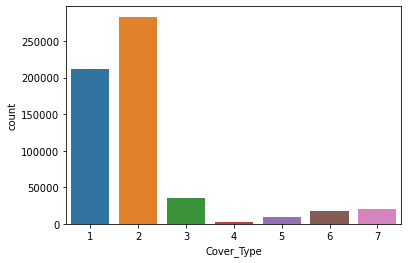

In [10]:
sns.countplot(data=df,x=df.Cover_Type)

### Handling Null Value

In [11]:
#The function dataframe.isnull().sum().sum() returns the number of missing values in the dataset.
df.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


## **Box Plot**

* A Box Plot is also known as Whisker plot is created to display the summary of the set of data values having properties like minimum, first quartile, median, third quartile and maximum.
* In the box plot, a box is created from the first quartile to the third quartile, a vertical line is also there which goes through the box at the median.
* Here x-axis denotes the data to be plotted while the y-axis shows the frequency distribution.
* Read more:-https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/

C:\Users\vedan\AppData\Local\Temp\ipykernel_4644\2369504884.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


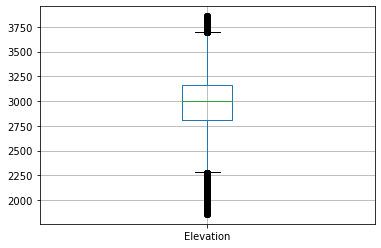

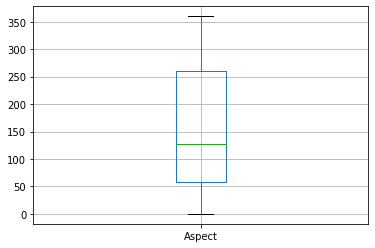

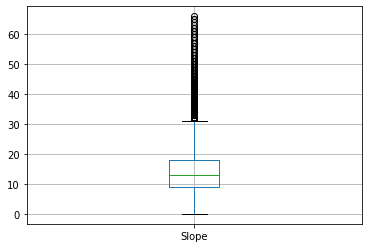

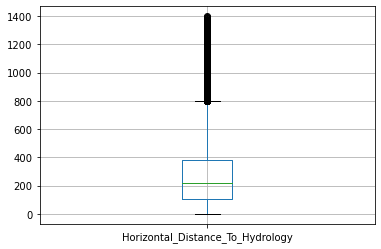

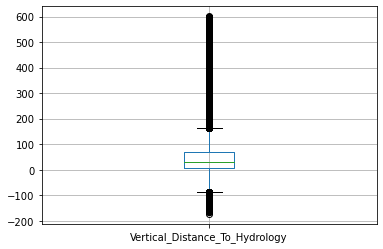

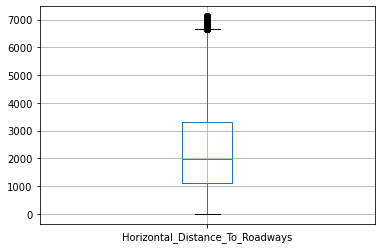

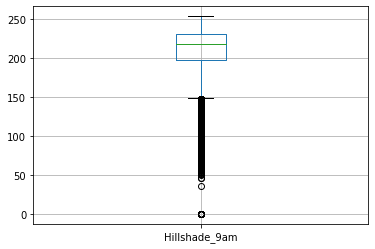

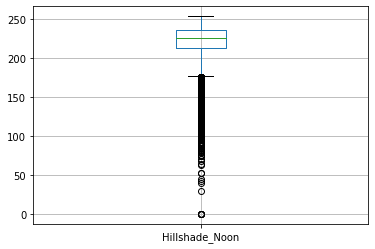

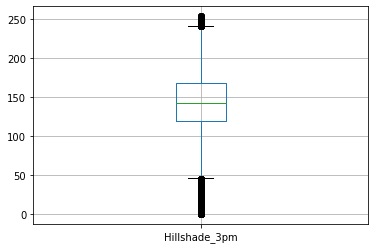

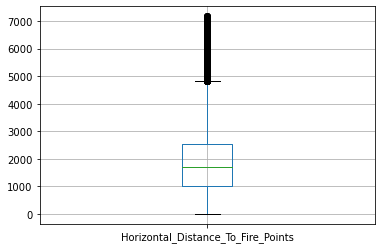

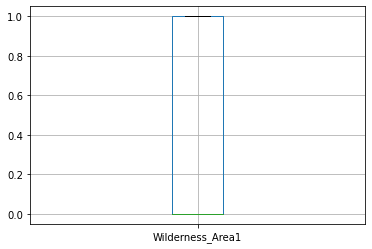

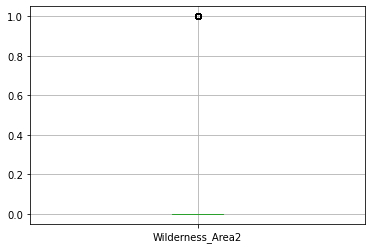

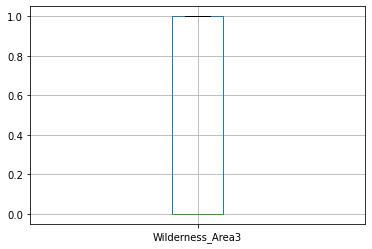

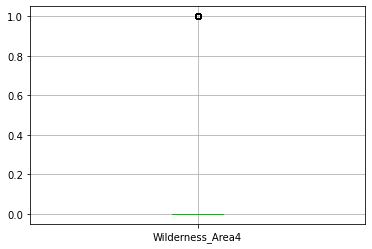

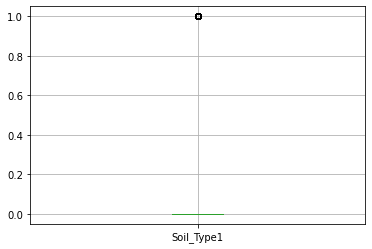

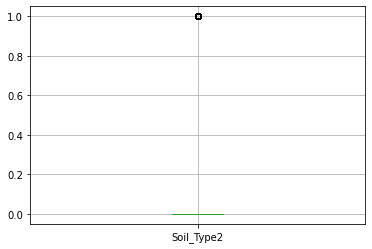

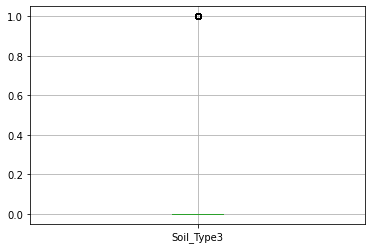

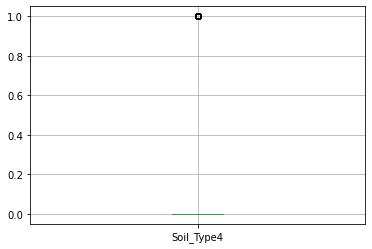

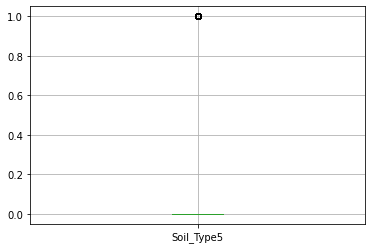

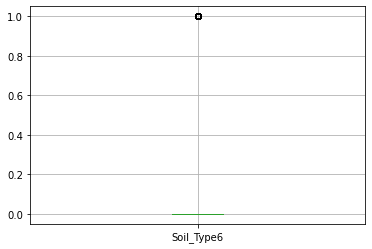

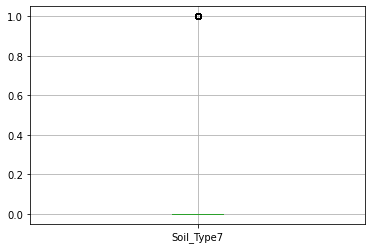

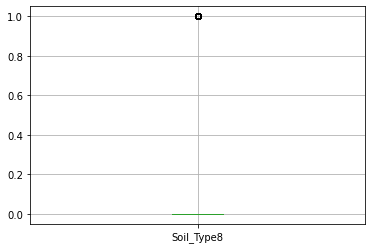

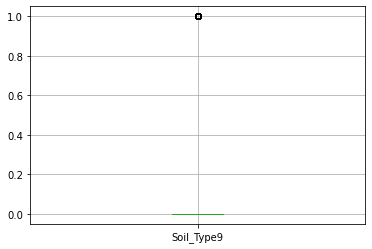

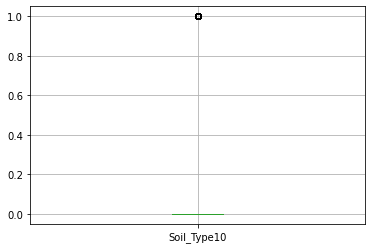

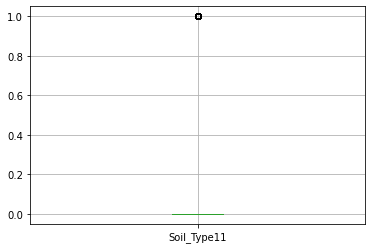

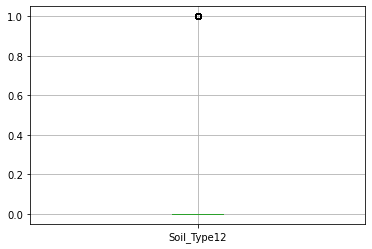

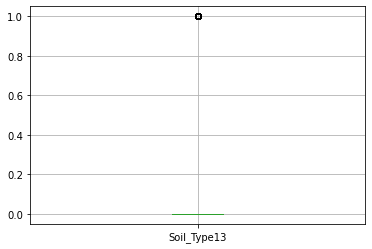

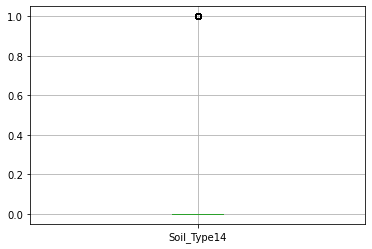

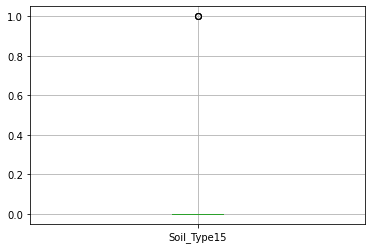

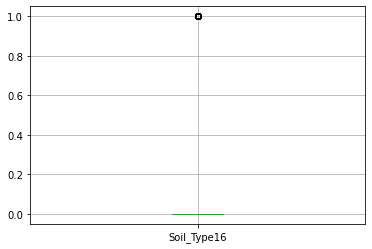

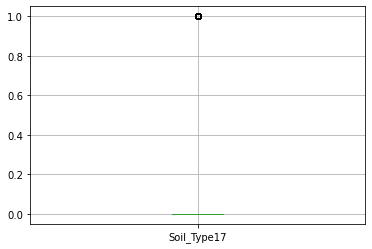

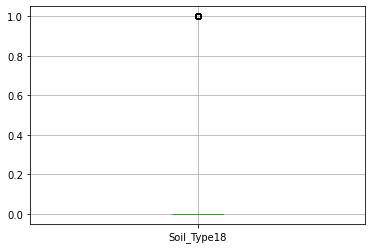

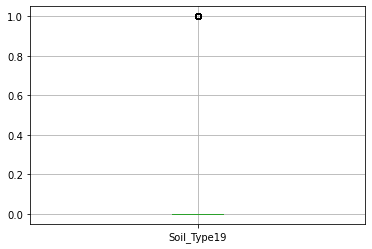

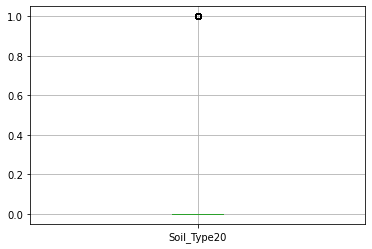

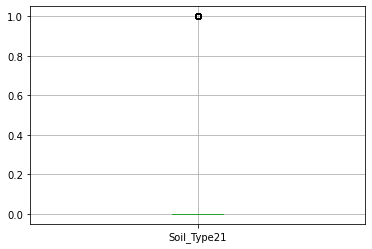

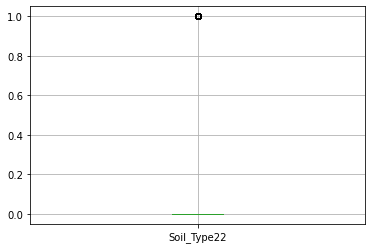

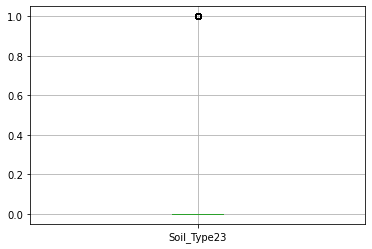

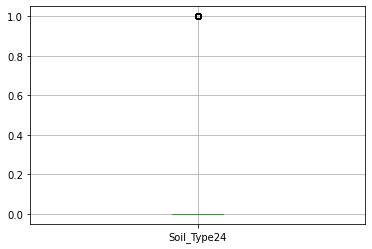

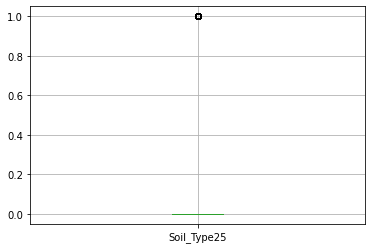

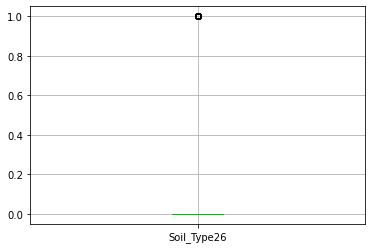

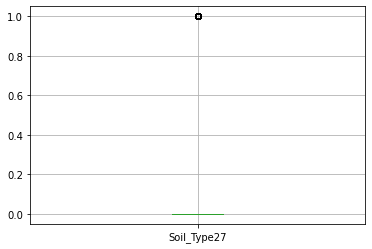

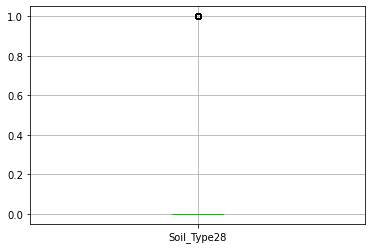

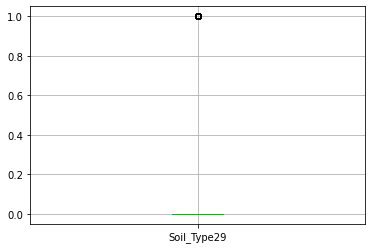

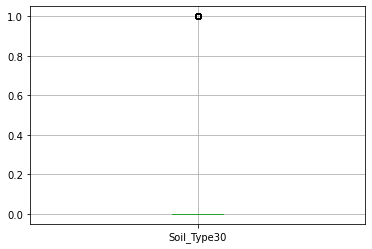

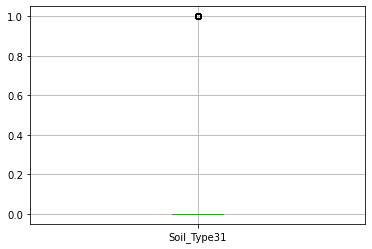

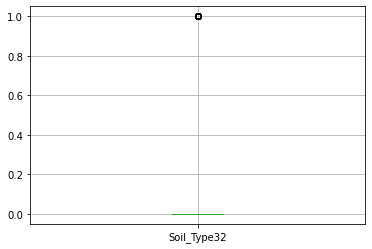

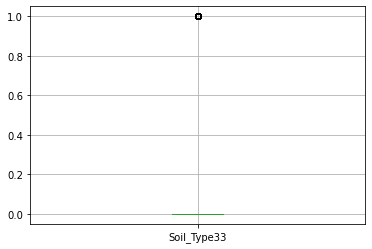

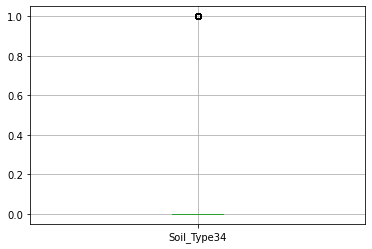

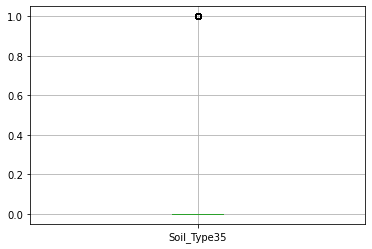

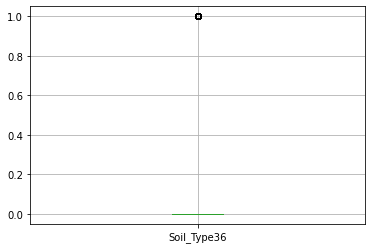

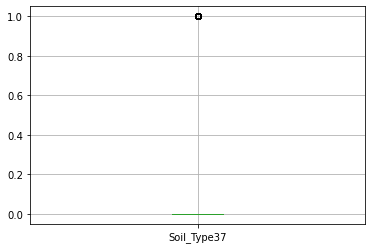

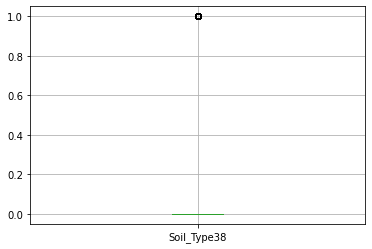

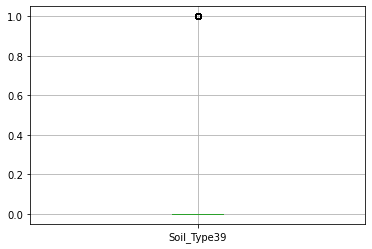

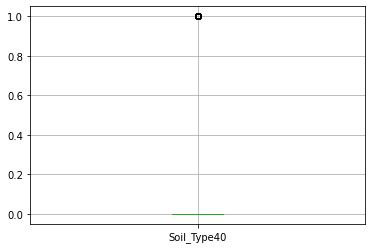

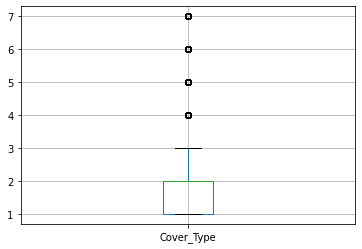

In [12]:
for column in df.columns:
  plt.figure()
  df.boxplot([column])

## Heat Maps

In [13]:
df.corr()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Elevation,1.000000,0.015735,-0.242697,0.306229,0.093306,0.365559,0.112179,0.205887,0.059148,0.148022,...,0.167077,0.070633,0.011731,0.083005,0.021107,0.035433,0.217179,0.193595,0.212612,-0.269554
Aspect,0.015735,1.000000,0.078728,0.017376,0.070305,0.025121,-0.579273,0.336103,0.646944,-0.109172,...,0.056233,0.019163,0.010861,-0.021991,0.002281,-0.020398,0.017706,0.008294,-0.005866,0.017080
Slope,-0.242697,0.078728,1.000000,-0.010607,0.274976,-0.215914,-0.327199,-0.526911,-0.175854,-0.185662,...,-0.133504,0.208942,-0.011002,-0.022228,0.002918,0.007848,-0.072208,0.093602,0.025637,0.148285
Horizontal_Distance_To_Hydrology,0.306229,0.017376,-0.010607,1.000000,0.606236,0.072030,-0.027088,0.046790,0.052330,0.051874,...,0.127217,0.101195,0.070268,-0.005231,0.033421,-0.006802,0.043031,0.031922,0.147020,-0.020317
Vertical_Distance_To_Hydrology,0.093306,0.070305,0.274976,0.606236,1.000000,-0.046372,-0.166333,-0.110957,0.034902,-0.069913,...,0.039762,0.167091,0.060274,-0.006092,0.012955,-0.007520,-0.008629,0.043859,0.179006,0.081664
Horizontal_Distance_To_Roadways,0.365559,0.025121,-0.215914,0.072030,-0.046372,1.000000,0.034349,0.189461,0.106119,0.331580,...,-0.089019,-0.082779,0.006390,-0.003000,0.007550,0.016313,0.079778,0.033762,0.016052,-0.153450
Hillshade_9am,0.112179,-0.579273,-0.327199,-0.027088,-0.166333,0.034349,1.000000,0.010037,-0.780296,0.132669,...,0.006494,-0.064381,0.007154,0.027870,0.007865,0.010332,0.015108,-0.029620,-0.000016,-0.035415
Hillshade_Noon,0.205887,0.336103,-0.526911,0.046790,-0.110957,0.189461,0.010037,1.000000,0.594274,0.057329,...,0.125395,-0.086164,0.043061,0.005863,0.016239,-0.022707,0.042952,-0.071961,-0.040176,-0.096426
Hillshade_3pm,0.059148,0.646944,-0.175854,0.052330,0.034902,0.106119,-0.780296,0.594274,1.000000,-0.047981,...,0.083066,-0.024393,0.017757,-0.016482,0.001330,-0.022064,0.022187,-0.029040,-0.024254,-0.048290
Horizontal_Distance_To_Fire_Points,0.148022,-0.109172,-0.185662,0.051874,-0.069913,0.331580,0.132669,0.057329,-0.047981,1.000000,...,-0.089977,-0.059067,-0.035067,-0.000081,-0.010595,0.004180,-0.019740,-0.003301,0.008915,-0.108936


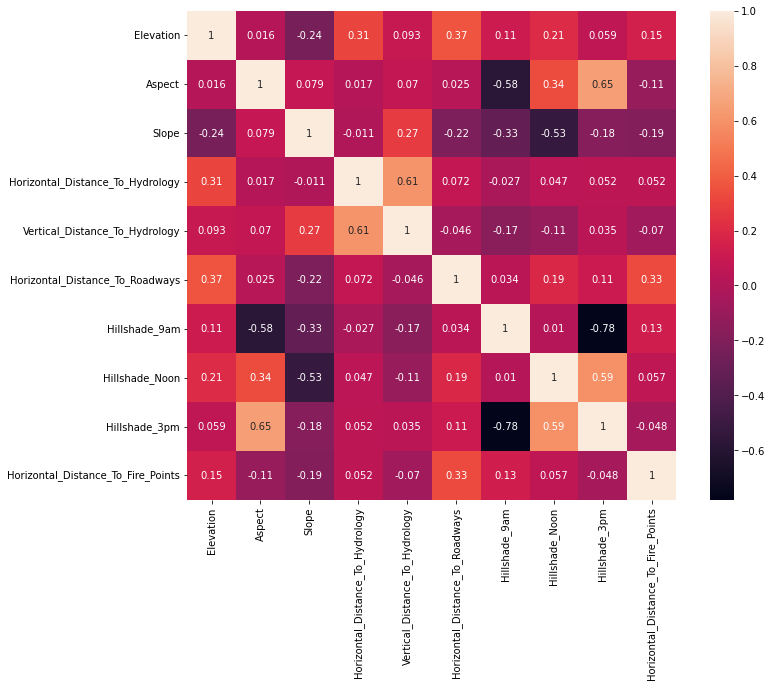

In [14]:
#Correlation Matrix
import seaborn as sns
corrmat = df.iloc[:,:10].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True, annot=True);

# <li> <i><u> Feature Engineering</i></u></li>
---
* Basic Idea: In Feature Engineering we are mainly interested in finding feature importance.
* In correlation part we were unable to find specific features so we will use ExtractTree Classifier to plot feature dependence plot

In [15]:
from sklearn.ensemble import ExtraTreesClassifier
x=df.drop(['Cover_Type'],axis=1)
y=df.Cover_Type

In [16]:
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier

In [17]:
Ext=ExtraTreesClassifier()
Ext.fit(x,y)

ExtraTreesClassifier()

In [18]:
print(Ext.feature_importances_)

[1.97850862e-01 5.14478215e-02 3.69533988e-02 6.43553553e-02
 5.93960569e-02 1.11296330e-01 4.29045578e-02 4.53270389e-02
 4.27051185e-02 1.05265834e-01 1.04806865e-02 6.53170759e-03
 1.09643785e-02 3.78342779e-02 1.36353728e-03 1.05575058e-02
 2.88791034e-03 1.42251689e-02 6.08774001e-04 3.09164191e-03
 4.58536897e-05 5.42652710e-05 2.17283473e-04 1.10769771e-02
 3.43569370e-03 1.47192454e-02 4.92005910e-03 6.29100946e-04
 4.78793450e-06 9.02148278e-04 1.99573282e-03 6.07956413e-04
 1.20149953e-03 2.09494559e-03 1.24573905e-03 2.02992724e-02
 1.32457817e-02 4.37939139e-03 3.15257667e-04 8.85173607e-04
 8.84743697e-04 3.65484146e-04 4.56661981e-03 3.32974736e-03
 3.26099185e-03 4.28543268e-03 3.65402959e-03 8.94330241e-04
 2.37812846e-03 1.35918308e-04 8.54713553e-04 1.44294459e-02
 1.43547594e-02 8.28152704e-03]


<AxesSubplot:>

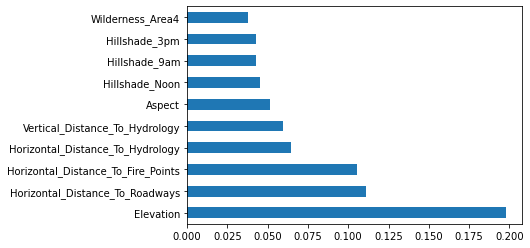

In [19]:
feature=pd.Series(Ext.feature_importances_,index=x.columns)
feature.sort_values(ascending=True).nlargest(10).plot(kind='barh')

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
df['Elevation']

0         2596
1         2590
2         2804
3         2785
4         2595
          ... 
581007    2396
581008    2391
581009    2386
581010    2384
581011    2383
Name: Elevation, Length: 581012, dtype: int64

In [22]:
x=x
y=df.Cover_Type

In [23]:
scale=StandardScaler()

In [24]:
scaled=scale.fit_transform(x)
scaled

array([[-1.29780509, -0.93515698, -1.48281978, ..., -0.16595612,
        -0.15601398, -0.12365355],
       [-1.31923485, -0.89047967, -1.61636259, ..., -0.16595612,
        -0.15601398, -0.12365355],
       [-0.5549068 , -0.14883628, -0.68156292, ..., -0.16595612,
        -0.15601398, -0.12365355],
       ...,
       [-2.04784663,  0.02987297,  0.38677957, ..., -0.16595612,
        -0.15601398, -0.12365355],
       [-2.05498988,  0.12816306,  0.11969395, ..., -0.16595612,
        -0.15601398, -0.12365355],
       [-2.05856151,  0.08348575, -0.14739167, ..., -0.16595612,
        -0.15601398, -0.12365355]])

In [25]:
 scaled_df=pd.DataFrame(scaled,columns=x.columns)
 scaled_df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,-1.297805,-0.935157,-1.482820,-0.053767,-0.796273,-1.180146,0.330743,0.439143,0.142960,3.246283,...,-0.21498,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654
1,-1.319235,-0.890480,-1.616363,-0.270188,-0.899197,-1.257106,0.293388,0.590899,0.221342,3.205504,...,-0.21498,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654
2,-0.554907,-0.148836,-0.681563,-0.006719,0.318742,0.532212,0.816364,0.742654,-0.196691,3.126965,...,-0.21498,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654
3,-0.622768,-0.005869,0.520322,-0.129044,1.227908,0.474492,0.965786,0.742654,-0.536343,3.194931,...,-0.21498,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654
4,-1.301377,-0.988770,-1.616363,-0.547771,-0.813427,-1.256464,0.293388,0.540313,0.195215,3.165479,...,-0.21498,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654


In [26]:
x_train,x_test,y_train,y_test=train_test_split(scaled_df,y,test_size=0.3,random_state=0)

In [27]:
x_test.shape

(174304, 54)

# <li><i><u>Model Development</i></u></li>
---
Let us use the following models:
* Logistic Regression
* SVM
* Random Forest

In [28]:
#importing Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score

**Logistic Regression**

In [29]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_train_hat=lr.predict(x_train)
y_test_hat=lr.predict(x_test)
print('Test Performance')
print('------------------------------')
print(classification_report(y_test,y_test_hat))

print('Confusion Matrix')
print('------------------------------')
print(confusion_matrix(y_test,y_test_hat))
print('')

print('Confusion Matrix')
print('------------------------------')
print("train data accuracy score:",accuracy_score(y_test,y_test_hat)*100)
print("test data accuracy score:", accuracy_score(y_train,y_train_hat)*100)

C:\Users\vedan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test Performance
------------------------------
              precision    recall  f1-score   support

           1       0.71      0.70      0.70     63498
           2       0.75      0.80      0.77     85198
           3       0.67      0.82      0.74     10581
           4       0.64      0.40      0.49       822
           5       0.11      0.00      0.01      2850
           6       0.49      0.24      0.32      5229
           7       0.72      0.58      0.65      6126

    accuracy                           0.72    174304
   macro avg       0.58      0.51      0.53    174304
weighted avg       0.71      0.72      0.71    174304

Confusion Matrix
------------------------------
[[44364 17784    12     0     0    29  1309]
 [15586 68048  1019     3    55   433    54]
 [    0  1017  8637   166     5   756     0]
 [    0     3   393   330     0    96     0]
 [   13  2726    85     0     8    18     0]
 [    0  1252  2681    17     8  1271     0]
 [ 2496    58     0     0     0     0

**SVM**

In [30]:
from sklearn.svm import LinearSVC
svm = LinearSVC(random_state=0, tol=1e-5)
svm.fit(x_train, y_train.ravel()) 
y_train_hat=svm.predict(x_train)
y_test_hat=svm.predict(x_test)
print('Test Performance')
print('------------------------------')
print(classification_report(y_test,y_test_hat))

print('Confusion Matrix')
print('------------------------------')
print(confusion_matrix(y_test,y_test_hat))
print('')

print('Confusion Matrix')
print('------------------------------')
print("train data accuracy score:",accuracy_score(y_test,y_test_hat)*100)
print("test data accuracy score:", accuracy_score(y_train,y_train_hat)*100)

C:\Users\vedan\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Test Performance
------------------------------
              precision    recall  f1-score   support

           1       0.70      0.69      0.70     63498
           2       0.74      0.79      0.76     85198
           3       0.61      0.85      0.71     10581
           4       0.67      0.27      0.38       822
           5       0.47      0.01      0.02      2850
           6       0.43      0.08      0.14      5229
           7       0.68      0.52      0.59      6126

    accuracy                           0.71    174304
   macro avg       0.61      0.46      0.47    174304
weighted avg       0.70      0.71      0.70    174304

Confusion Matrix
------------------------------
[[43648 18410    58     0     2     2  1378]
 [15367 67548  1967     1    31   137   147]
 [    0  1090  9039    91     0   361     0]
 [    0     0   520   220     0    82     0]
 [   70  2487   264     0    29     0     0]
 [    0  1902  2870    18     0   439     0]
 [ 2873    28    33     0     0     0

**Random Forest**

In [31]:
rf=RandomForestClassifier(n_jobs=-1,random_state=123)
rf.fit(x_train,y_train)
y_train_hat=rf.predict(x_train)
y_test_hat=rf.predict(x_test)
print('Test Performance')
print('------------------------------')
print(classification_report(y_test,y_test_hat))

print('Confusion Matrix')
print('------------------------------')
print(confusion_matrix(y_test,y_test_hat))
print('')

print('Confusion Matrix')
print('------------------------------')
print("train data accuracy score:",accuracy_score(y_test,y_test_hat)*100)
print("test data accuracy score:", accuracy_score(y_train,y_train_hat)*100)

Test Performance
------------------------------
              precision    recall  f1-score   support

           1       0.96      0.94      0.95     63498
           2       0.95      0.97      0.96     85198
           3       0.94      0.96      0.95     10581
           4       0.92      0.84      0.88       822
           5       0.94      0.77      0.85      2850
           6       0.93      0.90      0.91      5229
           7       0.97      0.95      0.96      6126

    accuracy                           0.95    174304
   macro avg       0.95      0.90      0.92    174304
weighted avg       0.95      0.95      0.95    174304

Confusion Matrix
------------------------------
[[59719  3609     3     0    15    14   138]
 [ 2065 82730   180     1   109    94    19]
 [    1   171 10166    39     7   197     0]
 [    0     0   110   687     0    25     0]
 [   33   602    18     0  2185    12     0]
 [    5   163   346    21     2  4692     0]
 [  290    39     0     0     0     0

## <center><i><h1><u>AutoML</u></h1></i></center>

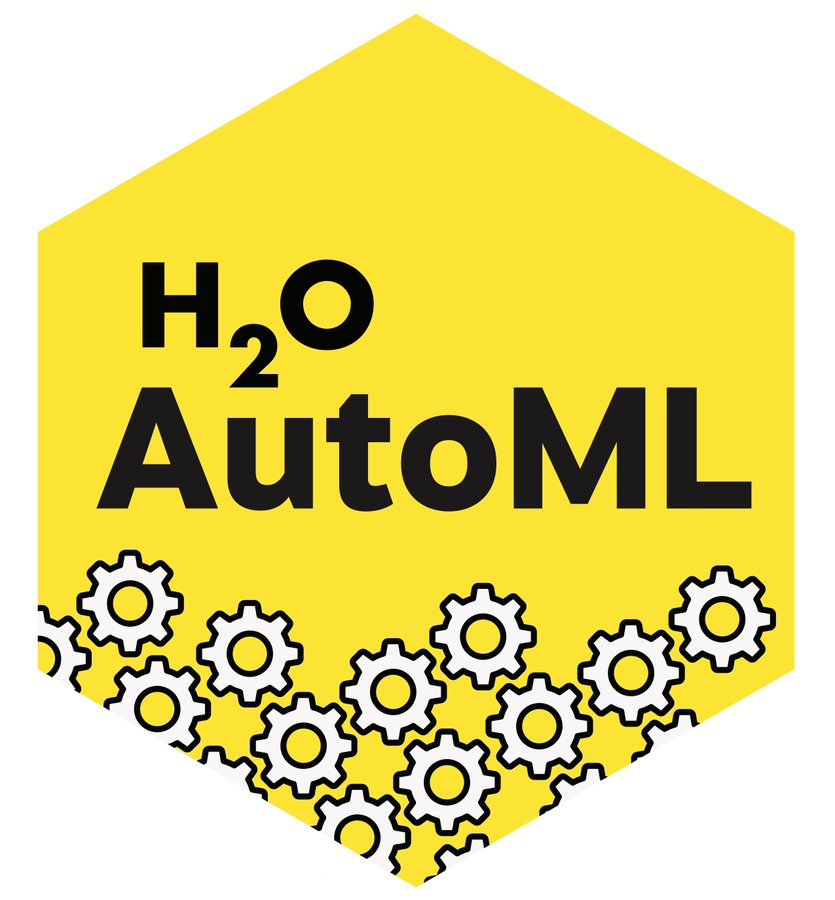
In recent years, the demand for machine learning experts has outpaced the supply, despite the surge of people entering the field. To address this gap, there have been big strides in the development of user-friendly machine learning software that can be used by non-experts. The first steps toward simplifying machine learning involved developing simple, unified interfaces to a variety of machine learning algorithms (e.g. H2O).
Read more at-https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html

In [32]:
#To run H2O with Python, the installation requires several dependencies. 
#So let us start installing the minimum set of dependencies to run H2O.
pip install h2o

Note: you may need to restart the kernel to use updated packages.


In [33]:
#command imports the H2O package in your program
import h2o
from h2o.automl import H2OAutoML

In [34]:
#method to initialize H2O
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM Zulu17.34+19-CA (build 17.0.3+7-LTS, mixed mode, sharing)
  Starting server from C:\Users\vedan\anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\vedan\AppData\Local\Temp\tmpiy8smc8g
  JVM stdout: C:\Users\vedan\AppData\Local\Temp\tmpiy8smc8g\h2o_vedan_started_from_python.out
  JVM stderr: C:\Users\vedan\AppData\Local\Temp\tmpiy8smc8g\h2o_vedan_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.4
H2O_cluster_version_age:,2 months and 16 days
H2O_cluster_name:,H2O_from_python_vedan_8809xf
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.947 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [35]:
#Importing the dataset
df=h2o.import_file(r"C:\Users\vedan\forest-cover-type-dataset\covtype.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [36]:
#Describing the dataset
df.describe(chunk_summary=True)

Rows:581012
Cols:55

Chunk compression summary: 
chunk_type    chunk_name                 count    count_percentage    size      size_percentage
------------  -------------------------  -------  ------------------  --------  -----------------
C0L           Constant long              805      45.7386             62.9 KB   0.594957
CBS           Binary                     124      7.04545             283.4 KB  2.68095
CXI           Sparse Integers            479      27.2159             590.7 KB  5.58799
C1N           1-Byte Integers (w/o NAs)  160      9.09091             2.8 MB    26.9388
C1S           1-Byte Fractions           2        0.113636            35.6 KB   0.337037
C2            2-Byte Integers            190      10.7955             6.6 MB    63.8603

Frame distribution summary: 
                 size     number_of_rows    number_of_chunks_per_column    number_of_chunks
---------------  -------  ----------------  -----------------------------  ------------------
127.0.0.1:54321  10.3 MB  581012            32                             1760
mean             10.3 MB  581012            32                             1760
min              10.3 MB  581012            32                             1760
max              10.3 MB  581012            32                             1760
stddev           0  B     0                 0                              0
total            10.3 MB  581012            32                             1760

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
type,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int
mins,1859.0,0.0,0.0,0.0,-173.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
mean,2959.3653005445635,155.65680743254876,14.10370353796479,269.4282166289162,46.41885537648108,2350.1466114297136,212.14604861861733,223.31871630878547,142.5282627553303,1980.2912263430023,0.4488650836815763,0.051434393781884025,0.4360736094951567,0.06362691304138296,0.005216759722690754,0.01295153972723455,0.008301033369362424,0.021335187569275674,0.0027486523514144282,0.011316461622135171,0.00018071915898466812,0.00030808313769767234,0.001974141670051565,0.056167514612434855,0.0213592834571403,0.05158413251361418,0.030001101526302382,0.0010309597736363448,5.163404542419089e-06,0.00489662864106077,0.005889723448052708,0.0032684350753512835,0.006920683221689053,0.015935987552752783,0.001442311002182399,0.05743943326471743,0.09939897971126242,0.03662230728453113,0.0008158179177022161,0.004456018120107674,0.0018691524443557104,0.001628193565709486,0.19835562776672427,0.05192663834826131,0.04417464699524278,0.09039228105443606,0.07771612290279718,0.0027727482392790512,0.0032546659965714993,0.00020481504684929054,0.0005128981845469629,0.026803232979697493,0.02376198770421265,0.01505992991538901,2.0514705376136773
maxs,3858.0,360.0,66.0,1397.0,601.0,7117.0,254.0,254.0,254.0,7173.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7.0
sigma,279.9847342506384,111.91372100329542,7.488241814480138,212.54935559508104,58.295231626887265,1559.2548698976082,26.769888805282154,19.76869715366644,38.274529231410625,1324.1952097801122,0.4973787752982269,0.22088227835340096,0.49589700528224767,0.24408734404115698,0.07203855962336297,0.11306555332463278,0.0907311434017385,0.14449925009498282,0.05235553437289729,0.10577532120143625,0.013441979413635856,0.017549608330903382,0.044387473748573734,0.23024512189599594,0.14457904566150806,0.22118610713609071,0.17059040277929843,0.032092034341499376,0.0022723086868991897,0.06980444151712221,0.07651826372232713,0.05707677298648147,0.08290234733979658,0.12522802739167158,0.03795040474080568,0.23268054915182682,0.29919722027093204,0.1878328368985242,0.02855089774099788,0.06660457685375033,0.0431933087937382,0.04031805239845813,0.3987617664461751,0.22187912770284748,0.20548313855427724,0.2867431918891412,0.267724579574964,0.05258388408562191,0.056956814599477115,0.014309907410203446,0.02264146643472854,0.16150809446310413,0.1523069124183252,0.1217914363007135,1.3965043160794075
zeros,0,4914,656,24603,38665,124,13,5,1338,51,320216,551128,327648,544044,577981,573487,576189,568616,579415,574437,580907,580833,579865,548378,568602,551041,563581,580413,581009,578167,577590,579113,576991,571753,580174,547639,523260,559734,580538,578423,579926,580066,465765,550842,555346,528493,535858,579401,579121,580893,580

In [37]:
#Top5 entries of Dataset
df.head()

Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2579,132,6,300,-15,67,230,237,140,6031,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2
2606,45,7,270,5,633,222,225,138,6256,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2605,49,4,234,7,573,222,230,144,6228,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2617,45,9,240,56,666,223,221,133,6244,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2612,59,10,247,11,636,228,219,124,6230,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [38]:
#H20 can do preprocessing techniques
df_train,df_test=df.split_frame(ratios=[.8])

In [39]:
#Splitting the Data
y="Cover_Type" #dependent variable
x=df.drop(y)
x=x.columns#Independent variable

In [40]:
x

['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'Wilderness_Area1',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Wilderness_Area4',
 'Soil_Type1',
 'Soil_Type2',
 'Soil_Type3',
 'Soil_Type4',
 'Soil_Type5',
 'Soil_Type6',
 'Soil_Type7',
 'Soil_Type8',
 'Soil_Type9',
 'Soil_Type10',
 'Soil_Type11',
 'Soil_Type12',
 'Soil_Type13',
 'Soil_Type14',
 'Soil_Type15',
 'Soil_Type16',
 'Soil_Type17',
 'Soil_Type18',
 'Soil_Type19',
 'Soil_Type20',
 'Soil_Type21',
 'Soil_Type22',
 'Soil_Type23',
 'Soil_Type24',
 'Soil_Type25',
 'Soil_Type26',
 'Soil_Type27',
 'Soil_Type28',
 'Soil_Type29',
 'Soil_Type30',
 'Soil_Type31',
 'Soil_Type32',
 'Soil_Type33',
 'Soil_Type34',
 'Soil_Type35',
 'Soil_Type36',
 'Soil_Type37',
 'Soil_Type38',
 'Soil_Type39',
 'Soil_Type40']

In [41]:
y

'Cover_Type'

In [10]:
#Defining a Model
aml=H2OAutoML(max_runtime_secs=7200,max_models=100,seed=100,verbosity="info",nfolds=10)

In [11]:
#fitting the model
aml.train(x=x,y=y,training_frame=df_train)

AutoML progress: |
18:47:04.729: Project: AutoML_1_20230317_184704
18:47:04.732: Setting stopping tolerance adaptively based on the training frame: 0.0014664443444866407
18:47:04.732: Build control seed: 100
18:47:04.733: training frame: Frame key: AutoML_1_20230317_184704_training_py_3_sid_ae91    cols: 55    rows: 465017  chunks: 32    size: 8691507  checksum: -2343952046546166364
18:47:04.733: validation frame: NULL
18:47:04.733: leaderboard frame: NULL
18:47:04.733: blending frame: NULL
18:47:04.733: response column: Cover_Type
18:47:04.734: fold column: null
18:47:04.734: weights column: null
18:47:04.748: AutoML: XGBoost is not available; skipping it.
18:47:04.754: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_anneali

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_1_20230317_184704_model_1


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    136                136                         2.36917e+06            0            13           8.60294       1             3573          1384.35

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.15029807848237664
RMSE: 0.38768296130005075
MAE: 0.22820465128353137
RMSLE: 0.11424149590200157
Mean Residual Deviance: 0.15029807848237664

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.2304627192791525
RMSE: 0.4800653281368615
MAE: 0.2677752962952908
RMSLE: 0.1335832321899685
Mean Residual Deviance: 0.2304627192791525

Cross-Validation Metrics Summary: 
                        mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
mae                     0.267775  0.00333974  0.272241      0.270095      0.269728      0.268747      0.263232      0.269473      0.261182      0.269157      0.266812      0.267086
mean_residual_deviance  0.230463  0.00543074  0.238579      0.234792      0.230396      0.231018      0.224531      0.232105      0.221477      0.232226      0.224378      0.235125
mse                     0.230463  0.00543074  0.238579      0.234792      0.230396      0.231018      0.224531      0.232105      0.221477      0.232226      0.224378      0.235125
r2                      0.881731  0.00260697  0.8786        0.879731      0.881622      0.881647      0.884596      0.880959      0.886184      0.880245      0.884732      0.878994
residual_deviance       0.230463  0.00543074  0.238579      0.234792      0.230396      0.231018      0.224531      0.232105      0.221477      0.232226      0.224378      0.235125
rmse                    0.480035  0.00566705  0.488446      0.484553      0.479996      0.480644      0.473847      0.481773      0.470613      0.481899      0.473686      0.484897
rmsle                   0.133576  0.00143872  0.135093      0.134304      0.135113      0.134685      0.132015      0.133403      0.131308      0.134405      0.131614      0.133822

Scoring History: 
     timestamp            duration          number_of_trees    training_rmse        training_mae         training_deviance
---  -------------------  ----------------  -----------------  -------------------  -------------------  -------------------
     2023-03-17 19:47:28  3 min 59.701 sec  0.0                1.3959173311640551   0.8166563908542237   1.9485851954441786
     2023-03-17 19:47:30  4 min  1.287 sec  5.0                1.1055094393444747   0.6587848127853835   1.2221511204797346
     2023-03-17 19:47:31  4 min  2.700 sec  10.0               0.908581826635316    0.5681097458971935   0.8255209356919674
     2023-03-17 19:47:33  4 min  4.048 sec  15.0               0.7736726490736404   0.49937453986869773  0.5985693679246243
     2023-03-17 19:47:34  4 min  5.415 sec  20.0               0.6884468295431379   0.44766730863442183  0.47395903710799836
     2023-03-17 19:47:35  4 min  6.703 sec  25.0               0.6386344197353906   0.41302905835306175  0.407853922070759
     2023-03-17 19:47:37  4 min  8.088 sec  30.0               0.5872413695605647   0.37578706189624383  0.34485242612336775
     2023-03-17 19:47:38  4 min  9.358 sec  35.0               0.551216263294863    0.34889002825890897  0.3038393689207517
     2023-03-17 19:47:39  4 m

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
GBM_grid_1_AutoML_1_20230317_184704_model_1,0.4837,0.233966,0.268431,0.134488,0.233966,24467,0.013632,GBM
DRF_1_AutoML_1_20230317_184704,0.492406,0.242464,0.273219,0.141734,0.242464,33752,0.00902,DRF
GBM_grid_1_AutoML_1_20230317_184704_model_11,0.51969,0.270077,0.287096,0.143364,0.270077,41140,0.0118,GBM
GBM_grid_1_AutoML_1_20230317_184704_model_8,0.524354,0.274947,0.296031,0.147534,0.274947,39989,0.007518,GBM
GBM_grid_1_AutoML_1_20230317_184704_model_6,0.53819,0.289648,0.312435,0.150414,0.289648,21283,0.010612,GBM
GBM_1_AutoML_1_20230317_184704,0.581779,0.338467,0.326771,0.158146,0.338467,33763,0.012001,GBM
GBM_grid_1_AutoML_1_20230317_184704_model_2,0.587985,0.345726,0.340425,0.162584,0.345726,29405,0.012278,GBM
GBM_4_AutoML_1_20230317_184704,0.59074,0.348973,0.347387,0.163173,0.348973,32546,0.012311,GBM
GBM_grid_1_AutoML_1_20230317_184704_model_4,0.591346,0.349691,0.330616,0.160224,0.349691,21050,0.007843,GBM
GBM_grid_1_AutoML_1_20230317_184704_model_9,0.62136,0.386088,0.357528,0.168918,0.386088,56186,0.013401,GBM


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

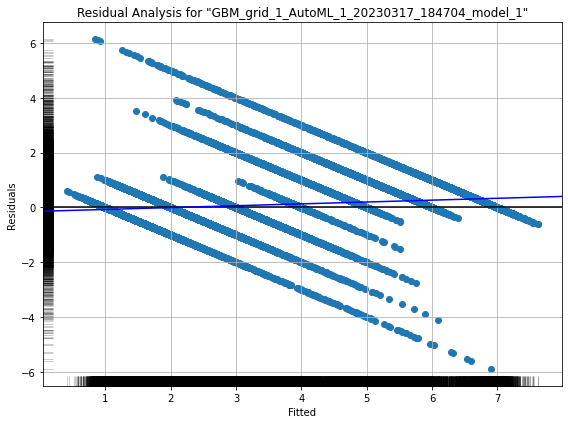

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

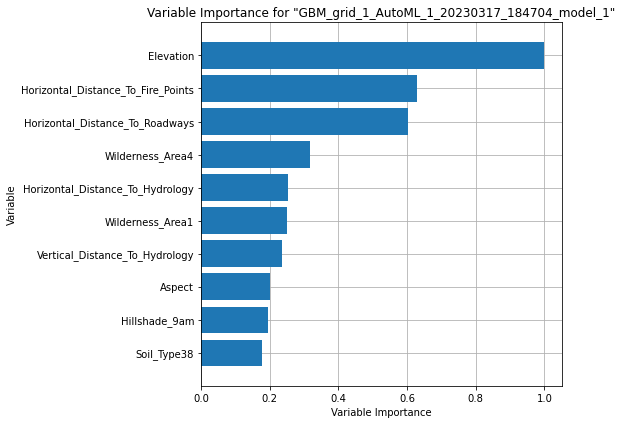

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

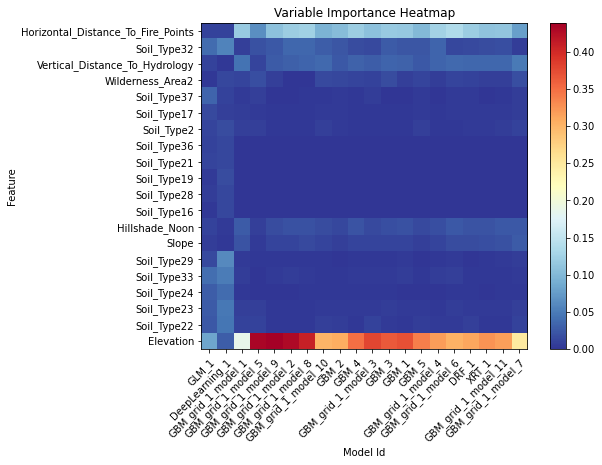

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

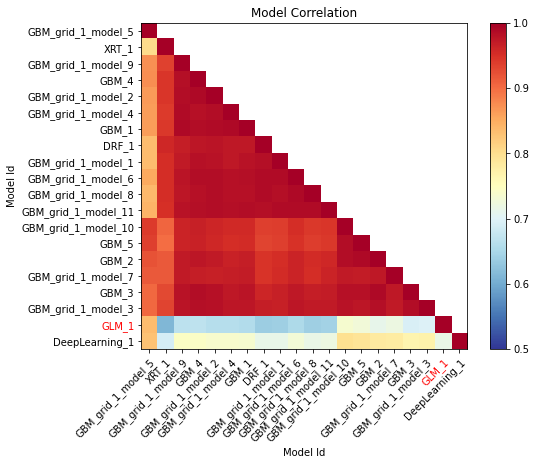

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

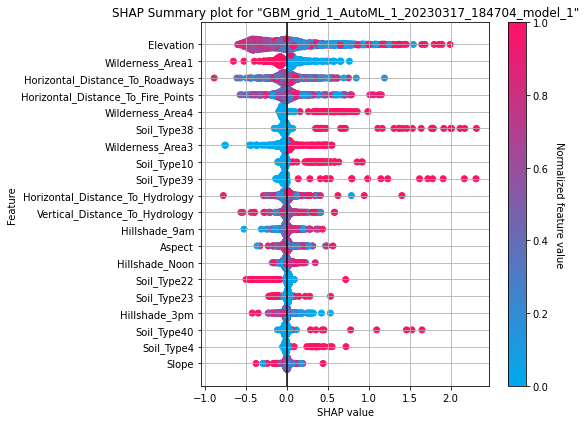

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

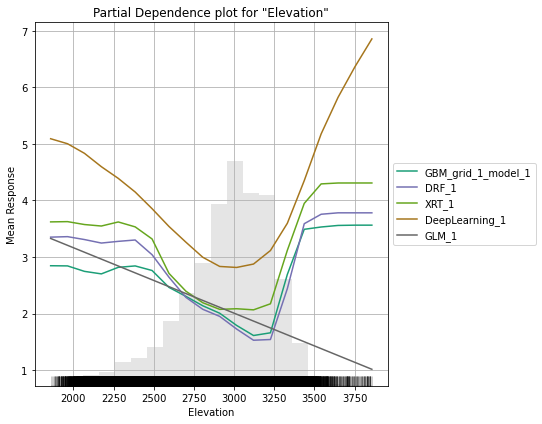

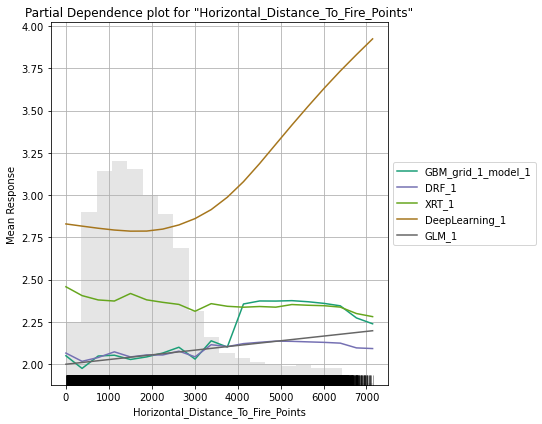

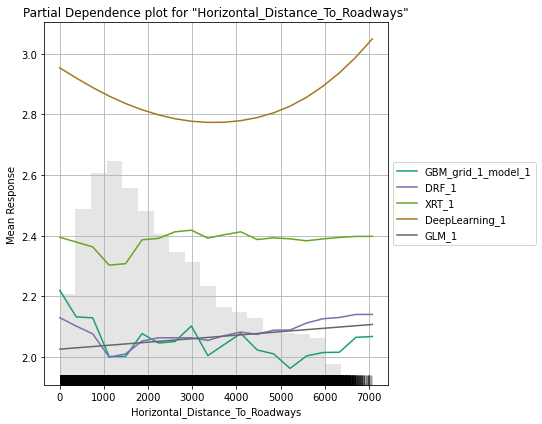

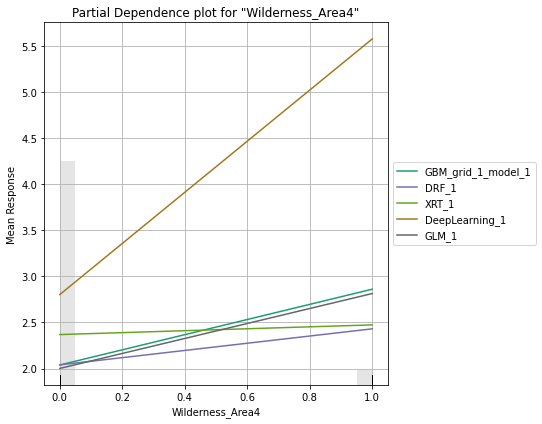

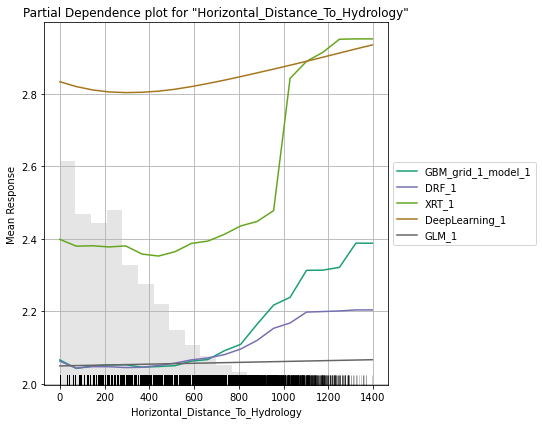

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

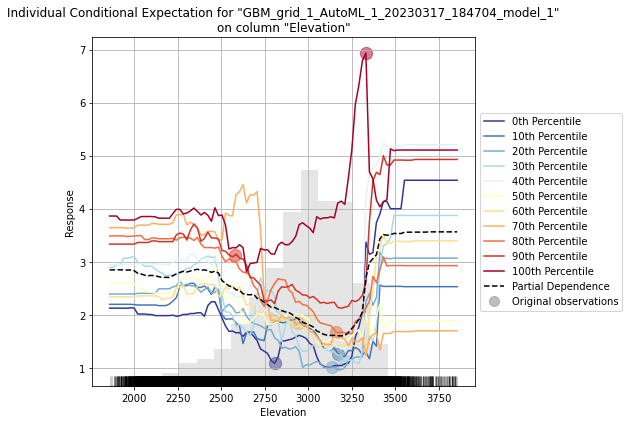

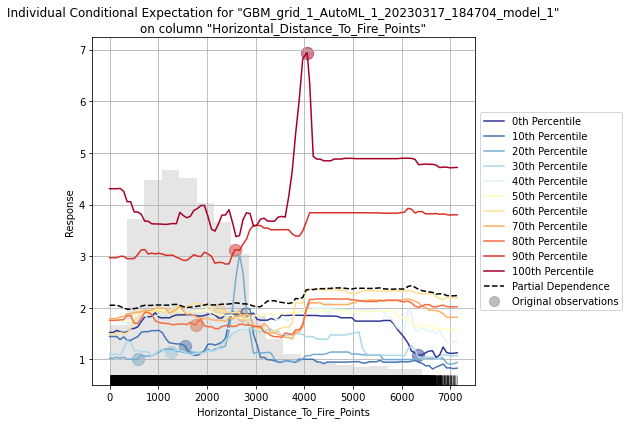

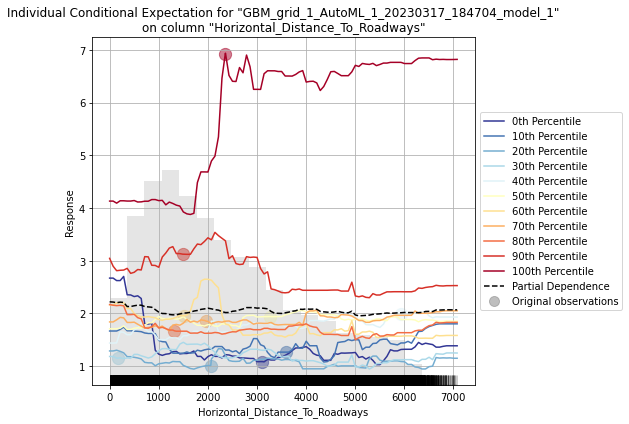

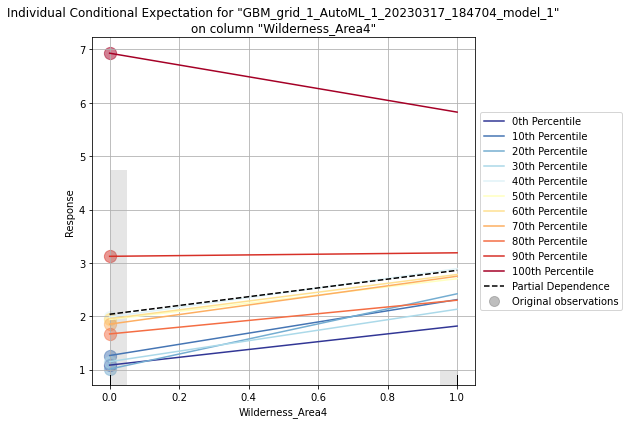

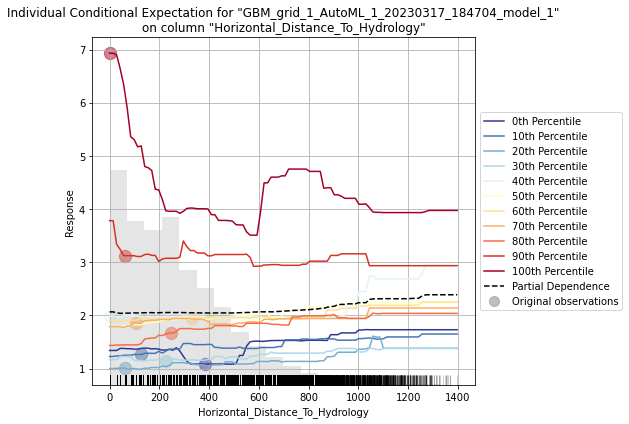

In [12]:
explain_model = aml.explain(frame = df_test, figsize = (8,6))

In [13]:
#seeing the leaderboard
lb=aml.leaderboard
lb

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
GBM_grid_1_AutoML_1_20230317_184704_model_1,0.480065,0.230463,0.267775,0.133583,0.230463
DRF_1_AutoML_1_20230317_184704,0.493868,0.243906,0.275378,0.141769,0.243906
GBM_grid_1_AutoML_1_20230317_184704_model_11,0.521967,0.27245,0.291284,0.14411,0.27245
GBM_grid_1_AutoML_1_20230317_184704_model_8,0.526123,0.276806,0.298361,0.14814,0.276806
GBM_grid_1_AutoML_1_20230317_184704_model_6,0.53594,0.287232,0.313935,0.150405,0.287232
GBM_1_AutoML_1_20230317_184704,0.585597,0.342924,0.332986,0.159891,0.342924
GBM_grid_1_AutoML_1_20230317_184704_model_2,0.585882,0.343258,0.33995,0.162097,0.343258
GBM_grid_1_AutoML_1_20230317_184704_model_4,0.595092,0.354134,0.336572,0.161787,0.354134
GBM_4_AutoML_1_20230317_184704,0.595586,0.354723,0.354772,0.165047,0.354723
GBM_grid_1_AutoML_1_20230317_184704_model_9,0.625248,0.390935,0.363758,0.170445,0.390935


In [14]:
#getting all model id
model_ids=list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
model_ids

['GBM_grid_1_AutoML_1_20230317_184704_model_1',
 'DRF_1_AutoML_1_20230317_184704',
 'GBM_grid_1_AutoML_1_20230317_184704_model_11',
 'GBM_grid_1_AutoML_1_20230317_184704_model_8',
 'GBM_grid_1_AutoML_1_20230317_184704_model_6',
 'GBM_1_AutoML_1_20230317_184704',
 'GBM_grid_1_AutoML_1_20230317_184704_model_2',
 'GBM_grid_1_AutoML_1_20230317_184704_model_4',
 'GBM_4_AutoML_1_20230317_184704',
 'GBM_grid_1_AutoML_1_20230317_184704_model_9',
 'GBM_grid_1_AutoML_1_20230317_184704_model_3',
 'GBM_3_AutoML_1_20230317_184704',
 'GBM_grid_1_AutoML_1_20230317_184704_model_7',
 'GBM_2_AutoML_1_20230317_184704',
 'XRT_1_AutoML_1_20230317_184704',
 'GBM_5_AutoML_1_20230317_184704',
 'GBM_grid_1_AutoML_1_20230317_184704_model_10',
 'GBM_grid_1_AutoML_1_20230317_184704_model_5',
 'DeepLearning_1_AutoML_1_20230317_184704',
 'GLM_1_AutoML_1_20230317_184704']

In [15]:
#getting model details for best performing model
h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_1_20230317_184704_model_1


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    136                136                         2.36917e+06            0            13           8.60294       1             3573          1384.35

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.15029807848237664
RMSE: 0.38768296130005075
MAE: 0.22820465128353137
RMSLE: 0.11424149590200157
Mean Residual Deviance: 0.15029807848237664

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.2304627192791525
RMSE: 0.4800653281368615
MAE: 0.2677752962952908
RMSLE: 0.1335832321899685
Mean Residual Deviance: 0.2304627192791525

Cross-Validation Metrics Summary: 
                        mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
mae                     0.267775  0.00333974  0.272241      0.270095      0.269728      0.268747      0.263232      0.269473      0.261182      0.269157      0.266812      0.267086
mean_residual_deviance  0.230463  0.00543074  0.238579      0.234792      0.230396      0.231018      0.224531      0.232105      0.221477      0.232226      0.224378      0.235125
mse                     0.230463  0.00543074  0.238579      0.234792      0.230396      0.231018      0.224531      0.232105      0.221477      0.232226      0.224378      0.235125
r2                      0.881731  0.00260697  0.8786        0.879731      0.881622      0.881647      0.884596      0.880959      0.886184      0.880245      0.884732      0.878994
residual_deviance       0.230463  0.00543074  0.238579      0.234792      0.230396      0.231018      0.224531      0.232105      0.221477      0.232226      0.224378      0.235125
rmse                    0.480035  0.00566705  0.488446      0.484553      0.479996      0.480644      0.473847      0.481773      0.470613      0.481899      0.473686      0.484897
rmsle                   0.133576  0.00143872  0.135093      0.134304      0.135113      0.134685      0.132015      0.133403      0.131308      0.134405      0.131614      0.133822

Scoring History: 
     timestamp            duration          number_of_trees    training_rmse        training_mae         training_deviance
---  -------------------  ----------------  -----------------  -------------------  -------------------  -------------------
     2023-03-17 19:47:28  3 min 59.701 sec  0.0                1.3959173311640551   0.8166563908542237   1.9485851954441786
     2023-03-17 19:47:30  4 min  1.287 sec  5.0                1.1055094393444747   0.6587848127853835   1.2221511204797346
     2023-03-17 19:47:31  4 min  2.700 sec  10.0               0.908581826635316    0.5681097458971935   0.8255209356919674
     2023-03-17 19:47:33  4 min  4.048 sec  15.0               0.7736726490736404   0.49937453986869773  0.5985693679246243
     2023-03-17 19:47:34  4 min  5.415 sec  20.0               0.6884468295431379   0.44766730863442183  0.47395903710799836
     2023-03-17 19:47:35  4 min  6.703 sec  25.0               0.6386344197353906   0.41302905835306175  0.407853922070759
     2023-03-17 19:47:37  4 min  8.088 sec  30.0               0.5872413695605647   0.37578706189624383  0.34485242612336775
     2023-03-17 19:47:38  4 min  9.358 sec  35.0               0.551216263294863    0.34889002825890897  0.3038393689207517
     2023-03-17 19:47:39  4 m

In [17]:
#Getting the leader details
aml.leader

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_1_20230317_184704_model_1


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    136                136                         2.36917e+06            0            13           8.60294       1             3573          1384.35

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.15029807848237664
RMSE: 0.38768296130005075
MAE: 0.22820465128353137
RMSLE: 0.11424149590200157
Mean Residual Deviance: 0.15029807848237664

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.2304627192791525
RMSE: 0.4800653281368615
MAE: 0.2677752962952908
RMSLE: 0.1335832321899685
Mean Residual Deviance: 0.2304627192791525

Cross-Validation Metrics Summary: 
                        mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
mae                     0.267775  0.00333974  0.272241      0.270095      0.269728      0.268747      0.263232      0.269473      0.261182      0.269157      0.266812      0.267086
mean_residual_deviance  0.230463  0.00543074  0.238579      0.234792      0.230396      0.231018      0.224531      0.232105      0.221477      0.232226      0.224378      0.235125
mse                     0.230463  0.00543074  0.238579      0.234792      0.230396      0.231018      0.224531      0.232105      0.221477      0.232226      0.224378      0.235125
r2                      0.881731  0.00260697  0.8786        0.879731      0.881622      0.881647      0.884596      0.880959      0.886184      0.880245      0.884732      0.878994
residual_deviance       0.230463  0.00543074  0.238579      0.234792      0.230396      0.231018      0.224531      0.232105      0.221477      0.232226      0.224378      0.235125
rmse                    0.480035  0.00566705  0.488446      0.484553      0.479996      0.480644      0.473847      0.481773      0.470613      0.481899      0.473686      0.484897
rmsle                   0.133576  0.00143872  0.135093      0.134304      0.135113      0.134685      0.132015      0.133403      0.131308      0.134405      0.131614      0.133822

Scoring History: 
     timestamp            duration          number_of_trees    training_rmse        training_mae         training_deviance
---  -------------------  ----------------  -----------------  -------------------  -------------------  -------------------
     2023-03-17 19:47:28  3 min 59.701 sec  0.0                1.3959173311640551   0.8166563908542237   1.9485851954441786
     2023-03-17 19:47:30  4 min  1.287 sec  5.0                1.1055094393444747   0.6587848127853835   1.2221511204797346
     2023-03-17 19:47:31  4 min  2.700 sec  10.0               0.908581826635316    0.5681097458971935   0.8255209356919674
     2023-03-17 19:47:33  4 min  4.048 sec  15.0               0.7736726490736404   0.49937453986869773  0.5985693679246243
     2023-03-17 19:47:34  4 min  5.415 sec  20.0               0.6884468295431379   0.44766730863442183  0.47395903710799836
     2023-03-17 19:47:35  4 min  6.703 sec  25.0               0.6386344197353906   0.41302905835306175  0.407853922070759
     2023-03-17 19:47:37  4 min  8.088 sec  30.0               0.5872413695605647   0.37578706189624383  0.34485242612336775
     2023-03-17 19:47:38  4 min  9.358 sec  35.0               0.551216263294863    0.34889002825890897  0.3038393689207517
     2023-03-17 19:47:39  4 m

In [18]:
#predict the output for the leader
y_pred=aml.leader.predict(df_test)
y_pred

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


predict
1.88253
4.88177
2.37307
1.96976
4.28259
1.71415
1.89383
1.901
2.06588
1.08521


In [19]:
y_pred=y_pred.round()
y_pred

predict
2
5
2
2
4
2
2
2
2
1


In [20]:
#summary for the predicted value
y_pred.summary()

C:\Users\vedan\AppData\Local\Temp\ipykernel_18752\897889269.py:1: H2ODeprecationWarning: ``summary()`` is deprecated, please use ``show_summary()`` or ``get_summary()`` instead
  y_pred.summary()


,predict
type,int
mins,0.0
mean,2.053062632010001
maxs,8.0
sigma,1.2668860463053946
zeros,2
missing,0
0,2.0
1,5.0
2,2.0


In [21]:
aml.get_best_model()

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_1_20230317_184704_model_1


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    136                136                         2.36917e+06            0            13           8.60294       1             3573          1384.35

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.15029807848237664
RMSE: 0.38768296130005075
MAE: 0.22820465128353137
RMSLE: 0.11424149590200157
Mean Residual Deviance: 0.15029807848237664

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.2304627192791525
RMSE: 0.4800653281368615
MAE: 0.2677752962952908
RMSLE: 0.1335832321899685
Mean Residual Deviance: 0.2304627192791525

Cross-Validation Metrics Summary: 
                        mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
mae                     0.267775  0.00333974  0.272241      0.270095      0.269728      0.268747      0.263232      0.269473      0.261182      0.269157      0.266812      0.267086
mean_residual_deviance  0.230463  0.00543074  0.238579      0.234792      0.230396      0.231018      0.224531      0.232105      0.221477      0.232226      0.224378      0.235125
mse                     0.230463  0.00543074  0.238579      0.234792      0.230396      0.231018      0.224531      0.232105      0.221477      0.232226      0.224378      0.235125
r2                      0.881731  0.00260697  0.8786        0.879731      0.881622      0.881647      0.884596      0.880959      0.886184      0.880245      0.884732      0.878994
residual_deviance       0.230463  0.00543074  0.238579      0.234792      0.230396      0.231018      0.224531      0.232105      0.221477      0.232226      0.224378      0.235125
rmse                    0.480035  0.00566705  0.488446      0.484553      0.479996      0.480644      0.473847      0.481773      0.470613      0.481899      0.473686      0.484897
rmsle                   0.133576  0.00143872  0.135093      0.134304      0.135113      0.134685      0.132015      0.133403      0.131308      0.134405      0.131614      0.133822

Scoring History: 
     timestamp            duration          number_of_trees    training_rmse        training_mae         training_deviance
---  -------------------  ----------------  -----------------  -------------------  -------------------  -------------------
     2023-03-17 19:47:28  3 min 59.701 sec  0.0                1.3959173311640551   0.8166563908542237   1.9485851954441786
     2023-03-17 19:47:30  4 min  1.287 sec  5.0                1.1055094393444747   0.6587848127853835   1.2221511204797346
     2023-03-17 19:47:31  4 min  2.700 sec  10.0               0.908581826635316    0.5681097458971935   0.8255209356919674
     2023-03-17 19:47:33  4 min  4.048 sec  15.0               0.7736726490736404   0.49937453986869773  0.5985693679246243
     2023-03-17 19:47:34  4 min  5.415 sec  20.0               0.6884468295431379   0.44766730863442183  0.47395903710799836
     2023-03-17 19:47:35  4 min  6.703 sec  25.0               0.6386344197353906   0.41302905835306175  0.407853922070759
     2023-03-17 19:47:37  4 min  8.088 sec  30.0               0.5872413695605647   0.37578706189624383  0.34485242612336775
     2023-03-17 19:47:38  4 min  9.358 sec  35.0               0.551216263294863    0.34889002825890897  0.3038393689207517
     2023-03-17 19:47:39  4 m

In [22]:
#Final Accuracy of the model
print((y_pred["predict"] == df_test["Cover_Type"]).mean())

[0.8609250398724083]


# **For n=8 fold CrossValidation**

In [42]:
#Defining a Model
aml=H2OAutoML(max_runtime_secs=7200,max_models=100,seed=100,verbosity="info",nfolds=8)

In [43]:
#fitting the model
aml.train(x=x,y=y,training_frame=df_train)

AutoML progress: |
01:38:19.83: Project: AutoML_1_20230322_13819
01:38:19.86: Setting stopping tolerance adaptively based on the training frame: 0.0014666446345705294
01:38:19.86: Build control seed: 100
01:38:19.87: training frame: Frame key: AutoML_1_20230322_13819_training_py_3_sid_8c99    cols: 55    rows: 464890  chunks: 32    size: 8689185  checksum: 2350046706863799517
01:38:19.87: validation frame: NULL
01:38:19.87: leaderboard frame: NULL
01:38:19.87: blending frame: NULL
01:38:19.89: response column: Cover_Type
01:38:19.89: fold column: null
01:38:19.89: weights column: null
01:38:19.106: AutoML: XGBoost is not available; skipping it.
01:38:19.114: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_annealing (7g, 10w)]

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_1_20230322_13819_model_12


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    110                110                         7.67558e+06            0            15           10.7727       1             11649         5559.21

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.06350701282688695
RMSE: 0.2520059777602249
MAE: 0.14926967218096118
RMSLE: 0.08106756616061037
Mean Residual Deviance: 0.06350701282688695

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.18213543442449145
RMSE: 0.4267732822289739
MAE: 0.21936435964040432
RMSLE: 0.11831453778493023
Mean Residual Deviance: 0.18213543442449145

Cross-Validation Metrics Summary: 
                        mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid
----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------
mae                     0.219364  0.00375629  0.22156       0.220586      0.212315      0.221935      0.222622      0.214638      0.220715      0.220543
mean_residual_deviance  0.182135  0.00470938  0.180012      0.182113      0.172798      0.183007      0.185412      0.181125      0.18346       0.189156
mse                     0.182135  0.00470938  0.180012      0.182113      0.172798      0.183007      0.185412      0.181125      0.18346       0.189156
r2                      0.906619  0.00255202  0.907746      0.906944      0.911641      0.905879      0.904768      0.907469      0.905493      0.903009
residual_deviance       0.182135  0.00470938  0.180012      0.182113      0.172798      0.183007      0.185412      0.181125      0.18346       0.189156
rmse                    0.426742  0.0055405   0.424279      0.426747      0.41569       0.427793      0.430595      0.425588      0.428322      0.43492
rmsle                   0.118307  0.00144791  0.118576      0.118181      0.115263      0.117983      0.119644      0.117716      0.119603      0.119489

Scoring History: 
     timestamp            duration           number_of_trees    training_rmse        training_mae         training_deviance
---  -------------------  -----------------  -----------------  -------------------  -------------------  -------------------
     2023-03-22 03:10:30  46 min  4.021 sec  0.0                1.3966133406617978   0.8168332216667592   1.9505288233145066
     2023-03-22 03:10:33  46 min  6.956 sec  5.0                0.9922519787745558   0.60022369846684     0.9845639893820217
     2023-03-22 03:10:36  46 min  9.899 sec  10.0               0.7821196312449858   0.49527676013545363  0.6117111175787927
     2023-03-22 03:10:39  46 min 12.914 sec  15.0               0.6522930082235968   0.4247423279165937   0.4254861685773894
     2023-03-22 03:10:42  46 min 15.926 sec  20.0               0.5623407244334002   0.3690371641311097   0.3162270903562814
     2023-03-22 03:10:44  46 min 18.839 sec  25.0               0.4949824739063008   0.3192496671813361   0.24500764947440173
     2023-03-22 03:10:47  46 min 21.728 sec  30.0               0.4533395040399547   0.2873573038279504   0.20551670592319213
     2023-03-22 03:10:50  46 min 24.687 sec  35.0               0.4152664052033733   0.2588951112519426   0.17244618729053224
     2023-03-22 03:10:53  46 min 27.473 sec  40.0               0.39316465286464175  0.24148817050120827  0.15457844426217426
     2023-03-22 03:10:56  46 min 30.346 sec  45.0               0.36468257578034735  0.22211255941114258  0.13299338107778877
---  ---         

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
GBM_grid_1_AutoML_1_20230322_13819_model_12,0.422983,0.178915,0.218738,0.117304,0.178915,47032,0.005329,GBM
GBM_grid_1_AutoML_1_20230322_13819_model_13,0.435623,0.189768,0.230901,0.122072,0.189768,41702,0.006236,GBM
GBM_grid_1_AutoML_1_20230322_13819_model_14,0.445316,0.198306,0.236837,0.12407,0.198306,25989,0.003513,GBM
GBM_grid_1_AutoML_1_20230322_13819_model_1,0.477801,0.228294,0.266049,0.133116,0.228294,30760,0.007126,GBM
GBM_grid_1_AutoML_1_20230322_13819_model_20,0.484841,0.23507,0.267913,0.134887,0.23507,21118,0.00484,GBM
DRF_1_AutoML_1_20230322_13819,0.490664,0.240752,0.272297,0.140665,0.240752,30446,0.004615,DRF
GBM_grid_1_AutoML_1_20230322_13819_model_11,0.51645,0.26672,0.284789,0.142124,0.26672,23884,0.005895,GBM
GBM_grid_1_AutoML_1_20230322_13819_model_8,0.524178,0.274763,0.296378,0.147882,0.274763,24550,0.003601,GBM
GBM_grid_1_AutoML_1_20230322_13819_model_18,0.535637,0.286907,0.310605,0.146348,0.286907,24784,0.006941,GBM
GBM_grid_1_AutoML_1_20230322_13819_model_6,0.538659,0.290153,0.314405,0.151149,0.290153,21041,0.004018,GBM


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

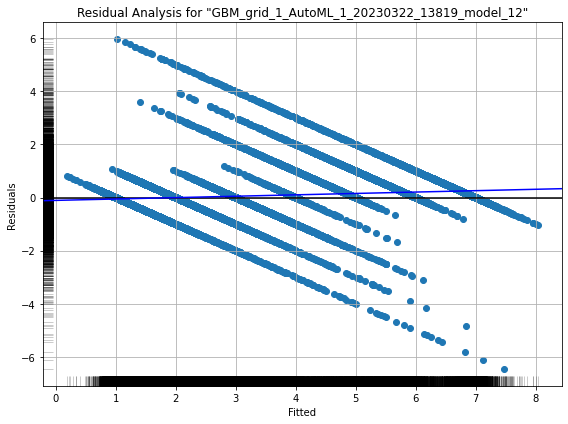

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

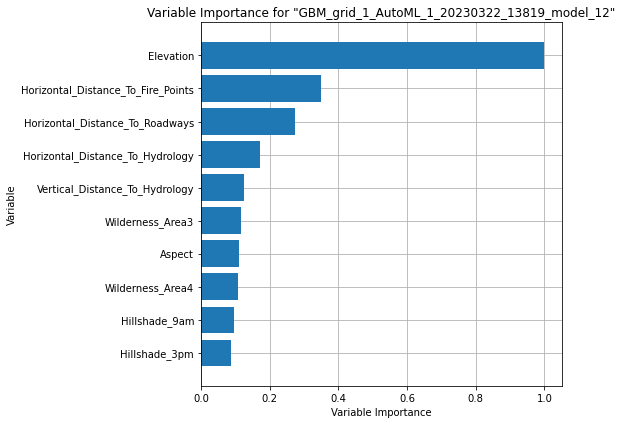

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

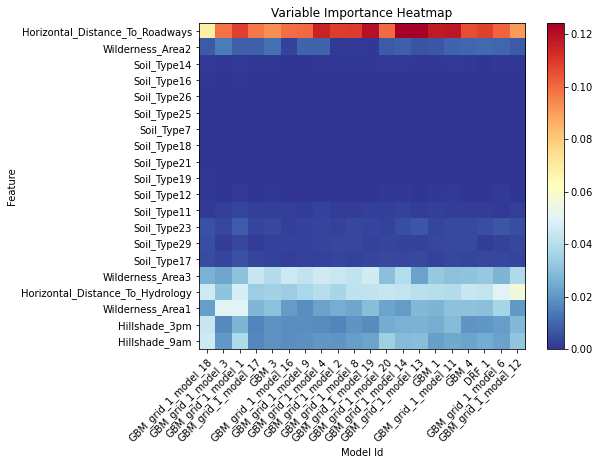

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

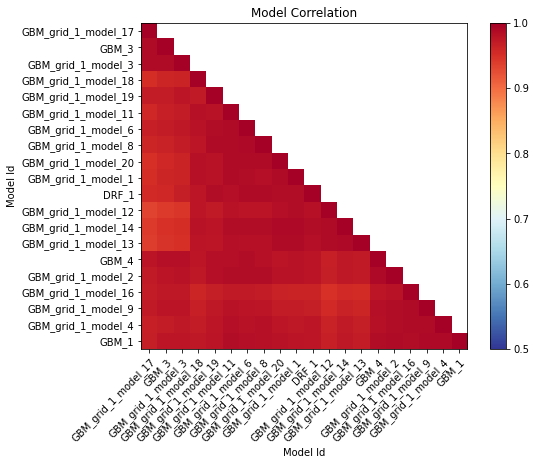

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

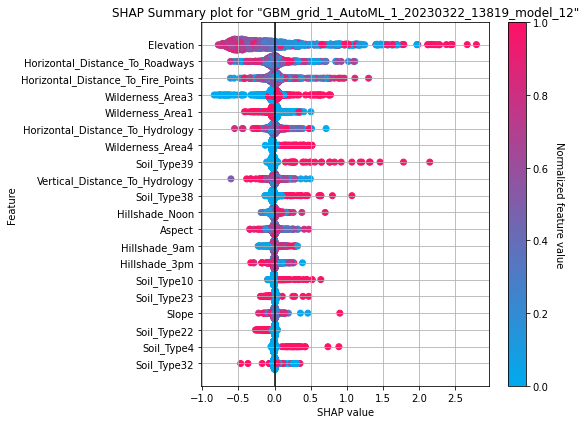

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

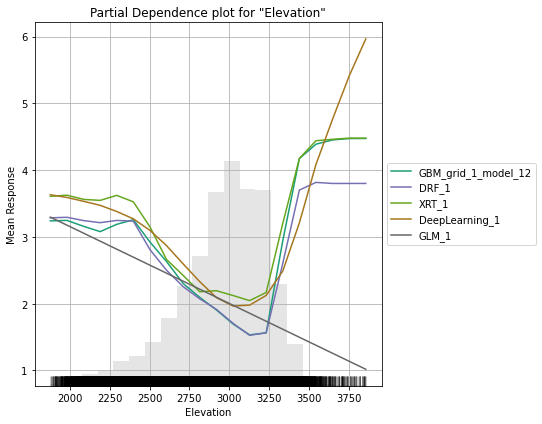

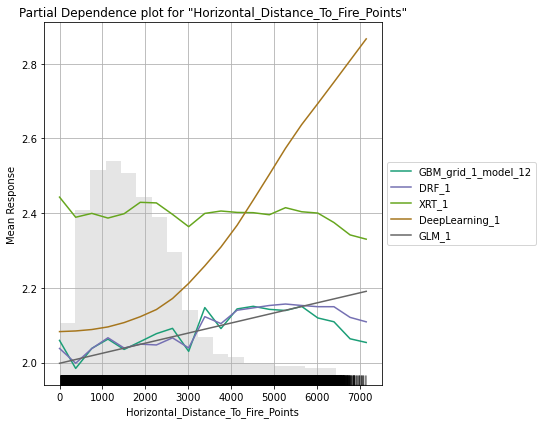

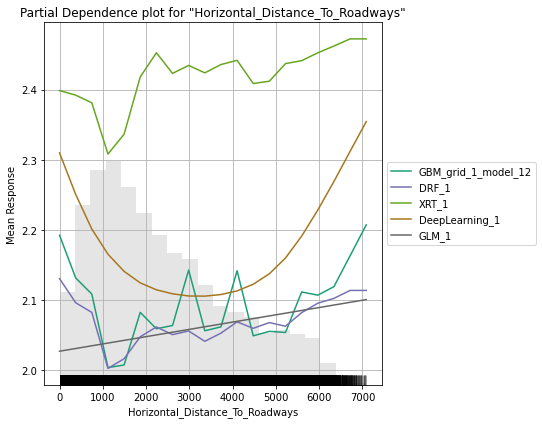

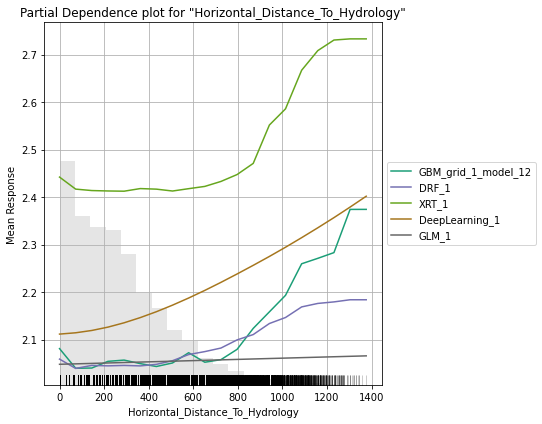

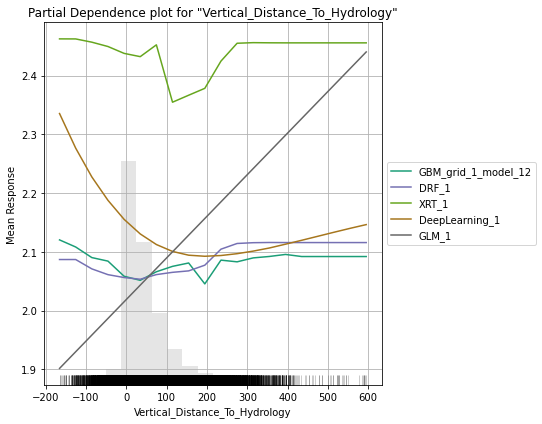

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

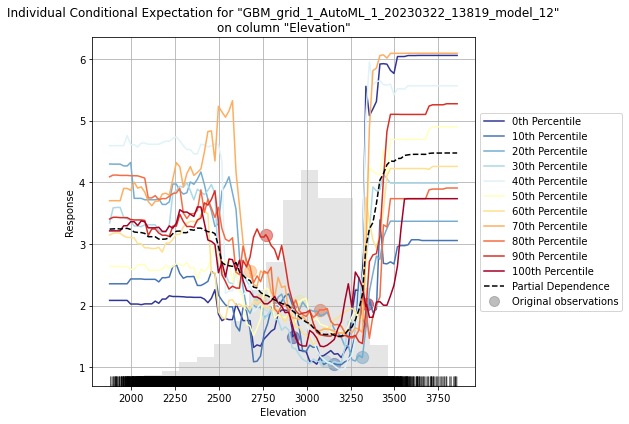

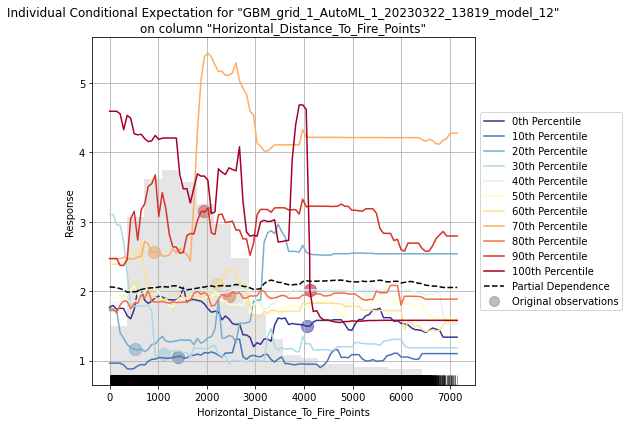

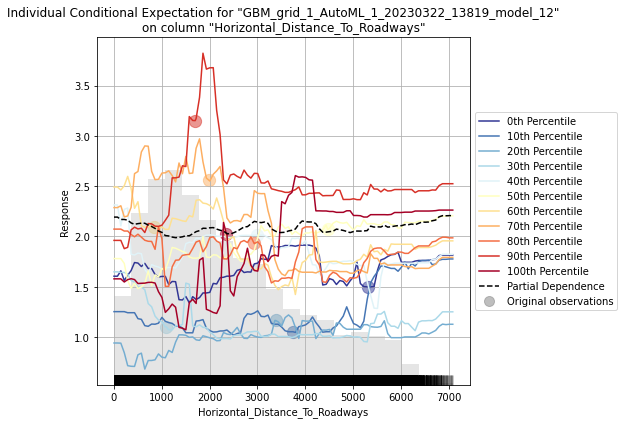

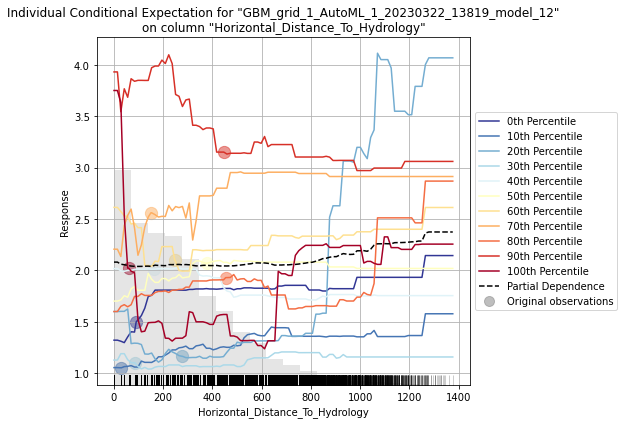

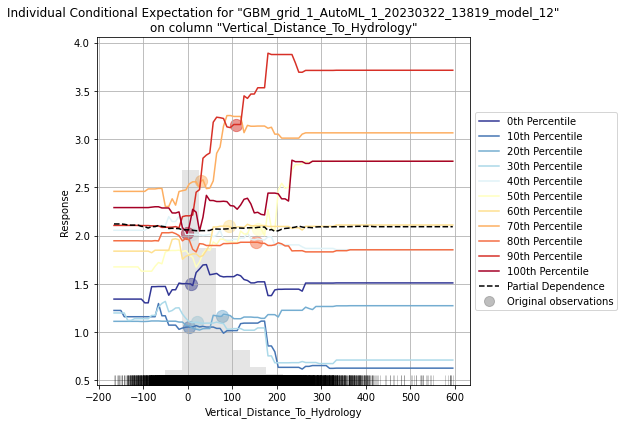

In [44]:
explain_model = aml.explain(frame = df_test, figsize = (8,6))

In [45]:
#seeing the leaderboard
lb=aml.leaderboard
lb

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
GBM_grid_1_AutoML_1_20230322_13819_model_12,0.426773,0.182135,0.219364,0.118315,0.182135
GBM_grid_1_AutoML_1_20230322_13819_model_13,0.440848,0.194347,0.233889,0.123734,0.194347
GBM_grid_1_AutoML_1_20230322_13819_model_14,0.45067,0.203103,0.240802,0.125456,0.203103
GBM_grid_1_AutoML_1_20230322_13819_model_1,0.485914,0.236113,0.271197,0.135191,0.236113
DRF_1_AutoML_1_20230322_13819,0.491889,0.241955,0.273596,0.141132,0.241955
GBM_grid_1_AutoML_1_20230322_13819_model_20,0.493578,0.243619,0.273906,0.137035,0.243619
GBM_grid_1_AutoML_1_20230322_13819_model_11,0.52438,0.274974,0.292294,0.1449,0.274974
GBM_grid_1_AutoML_1_20230322_13819_model_8,0.525469,0.276118,0.298406,0.148169,0.276118
GBM_grid_1_AutoML_1_20230322_13819_model_6,0.538636,0.290129,0.315132,0.151119,0.290129
GBM_grid_1_AutoML_1_20230322_13819_model_18,0.541261,0.292964,0.314316,0.147714,0.292964


In [46]:
#getting all model id
model_ids=list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
model_ids

['GBM_grid_1_AutoML_1_20230322_13819_model_12',
 'GBM_grid_1_AutoML_1_20230322_13819_model_13',
 'GBM_grid_1_AutoML_1_20230322_13819_model_14',
 'GBM_grid_1_AutoML_1_20230322_13819_model_1',
 'DRF_1_AutoML_1_20230322_13819',
 'GBM_grid_1_AutoML_1_20230322_13819_model_20',
 'GBM_grid_1_AutoML_1_20230322_13819_model_11',
 'GBM_grid_1_AutoML_1_20230322_13819_model_8',
 'GBM_grid_1_AutoML_1_20230322_13819_model_6',
 'GBM_grid_1_AutoML_1_20230322_13819_model_18',
 'GBM_grid_1_AutoML_1_20230322_13819_model_19',
 'GBM_grid_1_AutoML_1_20230322_13819_model_2',
 'GBM_1_AutoML_1_20230322_13819',
 'GBM_4_AutoML_1_20230322_13819',
 'GBM_grid_1_AutoML_1_20230322_13819_model_4',
 'GBM_grid_1_AutoML_1_20230322_13819_model_9',
 'GBM_grid_1_AutoML_1_20230322_13819_model_16',
 'GBM_grid_1_AutoML_1_20230322_13819_model_3',
 'GBM_3_AutoML_1_20230322_13819',
 'GBM_grid_1_AutoML_1_20230322_13819_model_17',
 'GBM_grid_1_AutoML_1_20230322_13819_model_15',
 'GBM_2_AutoML_1_20230322_13819',
 'GBM_grid_1_AutoML_1

In [47]:
#getting model details for best performing model
h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_1_20230322_13819_model_12


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    110                110                         7.67558e+06            0            15           10.7727       1             11649         5559.21

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.06350701282688695
RMSE: 0.2520059777602249
MAE: 0.14926967218096118
RMSLE: 0.08106756616061037
Mean Residual Deviance: 0.06350701282688695

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.18213543442449145
RMSE: 0.4267732822289739
MAE: 0.21936435964040432
RMSLE: 0.11831453778493023
Mean Residual Deviance: 0.18213543442449145

Cross-Validation Metrics Summary: 
                        mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid
----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------
mae                     0.219364  0.00375629  0.22156       0.220586      0.212315      0.221935      0.222622      0.214638      0.220715      0.220543
mean_residual_deviance  0.182135  0.00470938  0.180012      0.182113      0.172798      0.183007      0.185412      0.181125      0.18346       0.189156
mse                     0.182135  0.00470938  0.180012      0.182113      0.172798      0.183007      0.185412      0.181125      0.18346       0.189156
r2                      0.906619  0.00255202  0.907746      0.906944      0.911641      0.905879      0.904768      0.907469      0.905493      0.903009
residual_deviance       0.182135  0.00470938  0.180012      0.182113      0.172798      0.183007      0.185412      0.181125      0.18346       0.189156
rmse                    0.426742  0.0055405   0.424279      0.426747      0.41569       0.427793      0.430595      0.425588      0.428322      0.43492
rmsle                   0.118307  0.00144791  0.118576      0.118181      0.115263      0.117983      0.119644      0.117716      0.119603      0.119489

Scoring History: 
     timestamp            duration           number_of_trees    training_rmse        training_mae         training_deviance
---  -------------------  -----------------  -----------------  -------------------  -------------------  -------------------
     2023-03-22 03:10:30  46 min  4.021 sec  0.0                1.3966133406617978   0.8168332216667592   1.9505288233145066
     2023-03-22 03:10:33  46 min  6.956 sec  5.0                0.9922519787745558   0.60022369846684     0.9845639893820217
     2023-03-22 03:10:36  46 min  9.899 sec  10.0               0.7821196312449858   0.49527676013545363  0.6117111175787927
     2023-03-22 03:10:39  46 min 12.914 sec  15.0               0.6522930082235968   0.4247423279165937   0.4254861685773894
     2023-03-22 03:10:42  46 min 15.926 sec  20.0               0.5623407244334002   0.3690371641311097   0.3162270903562814
     2023-03-22 03:10:44  46 min 18.839 sec  25.0               0.4949824739063008   0.3192496671813361   0.24500764947440173
     2023-03-22 03:10:47  46 min 21.728 sec  30.0               0.4533395040399547   0.2873573038279504   0.20551670592319213
     2023-03-22 03:10:50  46 min 24.687 sec  35.0               0.4152664052033733   0.2588951112519426   0.17244618729053224
     2023-03-22 03:10:53  46 min 27.473 sec  40.0               0.39316465286464175  0.24148817050120827  0.15457844426217426
     2023-03-22 03:10:56  46 min 30.346 sec  45.0               0.36468257578034735  0.22211255941114258  0.13299338107778877
---  ---         

In [48]:
#Getting Details for the leader
aml.leader

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_1_20230322_13819_model_12


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    110                110                         7.67558e+06            0            15           10.7727       1             11649         5559.21

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.06350701282688695
RMSE: 0.2520059777602249
MAE: 0.14926967218096118
RMSLE: 0.08106756616061037
Mean Residual Deviance: 0.06350701282688695

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.18213543442449145
RMSE: 0.4267732822289739
MAE: 0.21936435964040432
RMSLE: 0.11831453778493023
Mean Residual Deviance: 0.18213543442449145

Cross-Validation Metrics Summary: 
                        mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid
----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------
mae                     0.219364  0.00375629  0.22156       0.220586      0.212315      0.221935      0.222622      0.214638      0.220715      0.220543
mean_residual_deviance  0.182135  0.00470938  0.180012      0.182113      0.172798      0.183007      0.185412      0.181125      0.18346       0.189156
mse                     0.182135  0.00470938  0.180012      0.182113      0.172798      0.183007      0.185412      0.181125      0.18346       0.189156
r2                      0.906619  0.00255202  0.907746      0.906944      0.911641      0.905879      0.904768      0.907469      0.905493      0.903009
residual_deviance       0.182135  0.00470938  0.180012      0.182113      0.172798      0.183007      0.185412      0.181125      0.18346       0.189156
rmse                    0.426742  0.0055405   0.424279      0.426747      0.41569       0.427793      0.430595      0.425588      0.428322      0.43492
rmsle                   0.118307  0.00144791  0.118576      0.118181      0.115263      0.117983      0.119644      0.117716      0.119603      0.119489

Scoring History: 
     timestamp            duration           number_of_trees    training_rmse        training_mae         training_deviance
---  -------------------  -----------------  -----------------  -------------------  -------------------  -------------------
     2023-03-22 03:10:30  46 min  4.021 sec  0.0                1.3966133406617978   0.8168332216667592   1.9505288233145066
     2023-03-22 03:10:33  46 min  6.956 sec  5.0                0.9922519787745558   0.60022369846684     0.9845639893820217
     2023-03-22 03:10:36  46 min  9.899 sec  10.0               0.7821196312449858   0.49527676013545363  0.6117111175787927
     2023-03-22 03:10:39  46 min 12.914 sec  15.0               0.6522930082235968   0.4247423279165937   0.4254861685773894
     2023-03-22 03:10:42  46 min 15.926 sec  20.0               0.5623407244334002   0.3690371641311097   0.3162270903562814
     2023-03-22 03:10:44  46 min 18.839 sec  25.0               0.4949824739063008   0.3192496671813361   0.24500764947440173
     2023-03-22 03:10:47  46 min 21.728 sec  30.0               0.4533395040399547   0.2873573038279504   0.20551670592319213
     2023-03-22 03:10:50  46 min 24.687 sec  35.0               0.4152664052033733   0.2588951112519426   0.17244618729053224
     2023-03-22 03:10:53  46 min 27.473 sec  40.0               0.39316465286464175  0.24148817050120827  0.15457844426217426
     2023-03-22 03:10:56  46 min 30.346 sec  45.0               0.36468257578034735  0.22211255941114258  0.13299338107778877
---  ---         

In [49]:
#Getting output for the test values
y_pred=aml.leader.predict(df_test)
y_pred

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


predict
4.74791
1.97523
2.14544
4.81837
2.45673
4.42087
5.09426
4.67809
4.73744
1.84692


In [50]:
#rounding off the outputs to nearest greatest integer 
y_pred=y_pred.round()
y_pred

predict
5
2
2
5
2
4
5
5
5
2


In [51]:
y_pred.summary()

C:\Users\vedan\AppData\Local\Temp\ipykernel_4644\897889269.py:1: H2ODeprecationWarning: ``summary()`` is deprecated, please use ``show_summary()`` or ``get_summary()`` instead
  y_pred.summary()


,predict
type,int
mins,0.0
mean,2.0491035290470365
maxs,8.0
sigma,1.298056015997719
zeros,8
missing,0
0,5.0
1,2.0
2,2.0


In [52]:
#Getting models details
aml.get_best_model()

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_1_20230322_13819_model_12


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    110                110                         7.67558e+06            0            15           10.7727       1             11649         5559.21

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.06350701282688695
RMSE: 0.2520059777602249
MAE: 0.14926967218096118
RMSLE: 0.08106756616061037
Mean Residual Deviance: 0.06350701282688695

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.18213543442449145
RMSE: 0.4267732822289739
MAE: 0.21936435964040432
RMSLE: 0.11831453778493023
Mean Residual Deviance: 0.18213543442449145

Cross-Validation Metrics Summary: 
                        mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid
----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------
mae                     0.219364  0.00375629  0.22156       0.220586      0.212315      0.221935      0.222622      0.214638      0.220715      0.220543
mean_residual_deviance  0.182135  0.00470938  0.180012      0.182113      0.172798      0.183007      0.185412      0.181125      0.18346       0.189156
mse                     0.182135  0.00470938  0.180012      0.182113      0.172798      0.183007      0.185412      0.181125      0.18346       0.189156
r2                      0.906619  0.00255202  0.907746      0.906944      0.911641      0.905879      0.904768      0.907469      0.905493      0.903009
residual_deviance       0.182135  0.00470938  0.180012      0.182113      0.172798      0.183007      0.185412      0.181125      0.18346       0.189156
rmse                    0.426742  0.0055405   0.424279      0.426747      0.41569       0.427793      0.430595      0.425588      0.428322      0.43492
rmsle                   0.118307  0.00144791  0.118576      0.118181      0.115263      0.117983      0.119644      0.117716      0.119603      0.119489

Scoring History: 
     timestamp            duration           number_of_trees    training_rmse        training_mae         training_deviance
---  -------------------  -----------------  -----------------  -------------------  -------------------  -------------------
     2023-03-22 03:10:30  46 min  4.021 sec  0.0                1.3966133406617978   0.8168332216667592   1.9505288233145066
     2023-03-22 03:10:33  46 min  6.956 sec  5.0                0.9922519787745558   0.60022369846684     0.9845639893820217
     2023-03-22 03:10:36  46 min  9.899 sec  10.0               0.7821196312449858   0.49527676013545363  0.6117111175787927
     2023-03-22 03:10:39  46 min 12.914 sec  15.0               0.6522930082235968   0.4247423279165937   0.4254861685773894
     2023-03-22 03:10:42  46 min 15.926 sec  20.0               0.5623407244334002   0.3690371641311097   0.3162270903562814
     2023-03-22 03:10:44  46 min 18.839 sec  25.0               0.4949824739063008   0.3192496671813361   0.24500764947440173
     2023-03-22 03:10:47  46 min 21.728 sec  30.0               0.4533395040399547   0.2873573038279504   0.20551670592319213
     2023-03-22 03:10:50  46 min 24.687 sec  35.0               0.4152664052033733   0.2588951112519426   0.17244618729053224
     2023-03-22 03:10:53  46 min 27.473 sec  40.0               0.39316465286464175  0.24148817050120827  0.15457844426217426
     2023-03-22 03:10:56  46 min 30.346 sec  45.0               0.36468257578034735  0.22211255941114258  0.13299338107778877
---  ---         

In [53]:
#Final Accuracy of the model
print((y_pred["predict"] == df_test["Cover_Type"]).mean())

[0.897487125609273]


<center><b><h1>Thankyou!!</h1></b></center>
